### Appendix/Code: Housing Prices Revisted
 - Data from housing prices is utilized to evaluate additional modeling methods from the previous study on housing prices within a 10-fold cross-validation design. In addition to linear regression models, other models explored are random forests, extra trees, models using gradient boosting, and a voting regressor. Furthermore, different variants are used for comparison. From the results, it is recommended that a voting regressor is used utilizing an ensemble of lasso and ridge regression. Data was taken from sales for residential homes in Ames, Iowa from 2006 to 2010.

### Import Libraries:

In [1]:
#For data
import pandas as pd

#For math
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from PIL import Image
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

#For statistics
from scipy import stats
from scipy.stats import kurtosis, skew, norm

#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

#Timer for execution time
from timeit import default_timer as timer

#Ignore warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Examining Data Set: Data Exploration and Visualization

In [170]:
#Display the first five rows of the train dataset.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
#Display the first five rows of the test dataset.
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Yearly Sales By Month and Year:

In [145]:
train.groupby(['YrSold', 'MoSold'])['SalePrice'].sum().unstack()

MoSold,1,2,3,4,5,6,7,8,9,10,11,12
YrSold,,,,,,,,,,,,
2006,2010900.000,1748900.000,4624555.000,4706446.000,6039275.000,8269600.000,12275141.000,4513519.000,3356533.000,4136561.000,3412560.000,2226540.000
2007,2382050.000,1410414.000,4061059.000,3927770.000,7304561.000,10603823.000,9965239.000,7357643.000,2150872.000,3446861.000,4745024.000,3859461.000
2008,2320561.000,1593700.000,3213095.000,4141627.000,7156710.000,8656278.000,8553570.000,5686232.000,2883650.000,3667194.000,3586678.000,2458400.000
2009,2276826.000,1874500.000,3259400.000,4723700.000,6085869.000,10812395.000,12077049.000,4970129.000,3936987.000,4730578.000,3440400.000,2460218.000
2010,1638526.000,2622350.000,4266807.000,6682417.000,8564268.000,6539025.000,730500.000,nan,nan,nan,nan,nan


In [3]:
#Dropping the ID
#Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Drop 'Id' column since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#Check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


#### Correlation Heatmap to See How Features are Correlated with Sale Price:
 - The correlation heatmap shows that there are a few numerical features that have correlations with sale price that seem to have acceptable relationships such as lot frontage, full bath, and so on. However, the design of this exercise is to test features using a linear regression model utilizing different methods (OLS, Ridge, and Lasso), which may have different results with coefficients in regards to numerical correlations.   

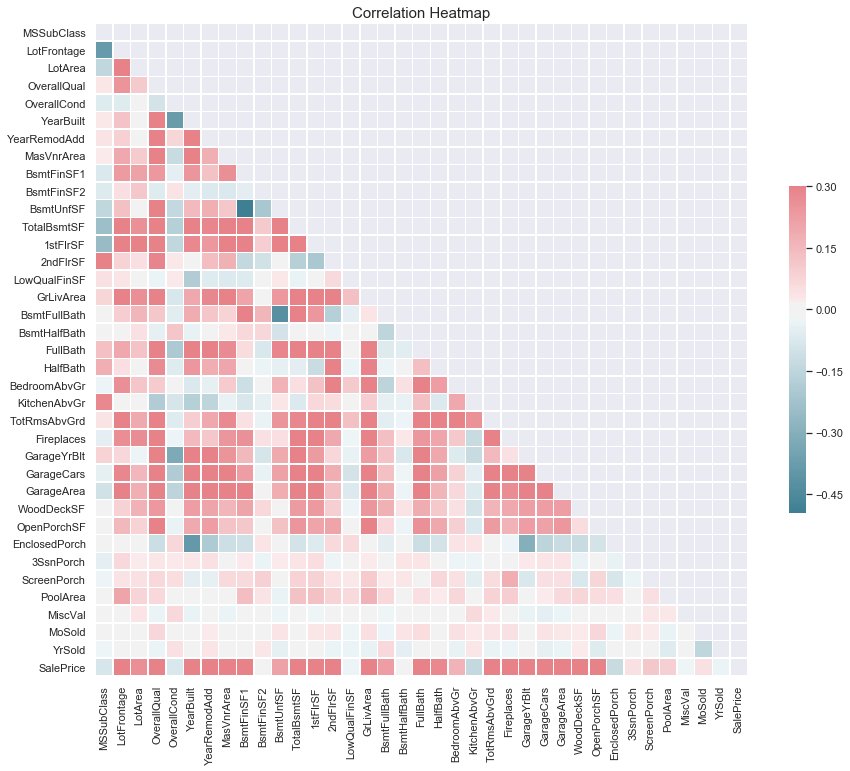

In [426]:
#Correlation Heatmap to see how features are correlated with sale price
#Compute correlation matrix
corr = train.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

#Draw the heat map
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Correlation Heatmap', fontsize='15')
plt.savefig('Correlation heatmap')
plt.show();

#### Correlation by Sales Price
 - Interestingly the highest correlation to sales price is overall material and finish quality, and not overall condition rating.

In [148]:
#Correlation by sale price
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

#### Descriptive Statistics:
 - Descriptive statistics are shown for the top 10 highest correlations to sales price. It is interesting to note that the overall material and finish quality mean score and median score is 6 out of 10, which has the highest correlation to sales price. This accounts for 922 homes from the training data (shown below).
 - It is interesting to note that any scores from 5 and higher accounted for 1319 of training data, which is about 90% of all sales for homes. The median sales price for homes scores 5 and above were $133,000 and over. 

In [220]:
train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
       'YearRemodAdd']].describe().transpose().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.000,180921.196,79442.503,34900.000,129975.000,163000.000,214000.000,755000.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
GrLivArea,1460.000,1515.464,525.480,334.000,1129.500,1464.000,1776.750,5642.000
1stFlrSF,1460.000,1162.627,386.588,334.000,882.000,1087.000,1391.250,4692.000
TotalBsmtSF,1460.000,1057.429,438.705,0.000,795.750,991.500,1298.250,6110.000
GarageArea,1460.000,472.980,213.805,0.000,334.500,480.000,576.000,1418.000
TotRmsAbvGrd,1460.000,6.518,1.625,2.000,5.000,6.000,7.000,14.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
GarageCars,1460.000,1.767,0.747,0.000,1.000,2.000,2.000,4.000


#### Scores from 5 and higher accounted for 1319 of training data, which is about 90% of all sales for homes. The median sales price for homes scores 5 and above were $133,000 and over.

In [221]:
#Number of Overall Material and Finish Quality by Median Home Sales Price, Above grade (ground) 
#living area square feet, 1st floor square feet, total rooms above grade, year built, and year remodeled.
overall_qual_median  = pd.DataFrame(train.groupby('OverallQual')['SalePrice', 'GrLivArea', 'GarageCars', 
                                                                 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
                                                                 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
                                                                 'YearRemodAdd'].transform(lambda x: x.median()))
overall_qual_median['OverallQual'] = train['OverallQual']
overall_qual_median.groupby(['OverallQual', 'SalePrice', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 
                            'YearRemodAdd'])['SalePrice'].count()

OverallQual  SalePrice   GrLivArea  1stFlrSF  TotRmsAbvGrd  YearBuilt  YearRemodAdd
1            50150.000   619.000    619.000   3.000         1934.000   1950.000          2
2            60000.000   480.000    480.000   4.000         1936.000   1950.000          3
3            86250.000   1040.000   919.000   6.000         1935.000   1950.000         20
4            108000.000  1051.500   888.000   5.000         1954.000   1961.000        116
5            133000.000  1144.000   1021.000  6.000         1959.000   1971.000        397
6            160000.000  1440.500   1046.000  6.000         1971.000   1980.500        374
7            200141.000  1656.000   1186.000  7.000         2000.000   2002.000        319
8            269750.000  1813.500   1483.000  7.000         2003.000   2004.000        168
9            345000.000  1922.000   1766.000  8.000         2006.000   2006.000         43
10           432390.000  2517.500   2048.000  10.000        2006.000   2006.500         18
Name: 

#### Plot shows sales by score are heavily skewed to the left.

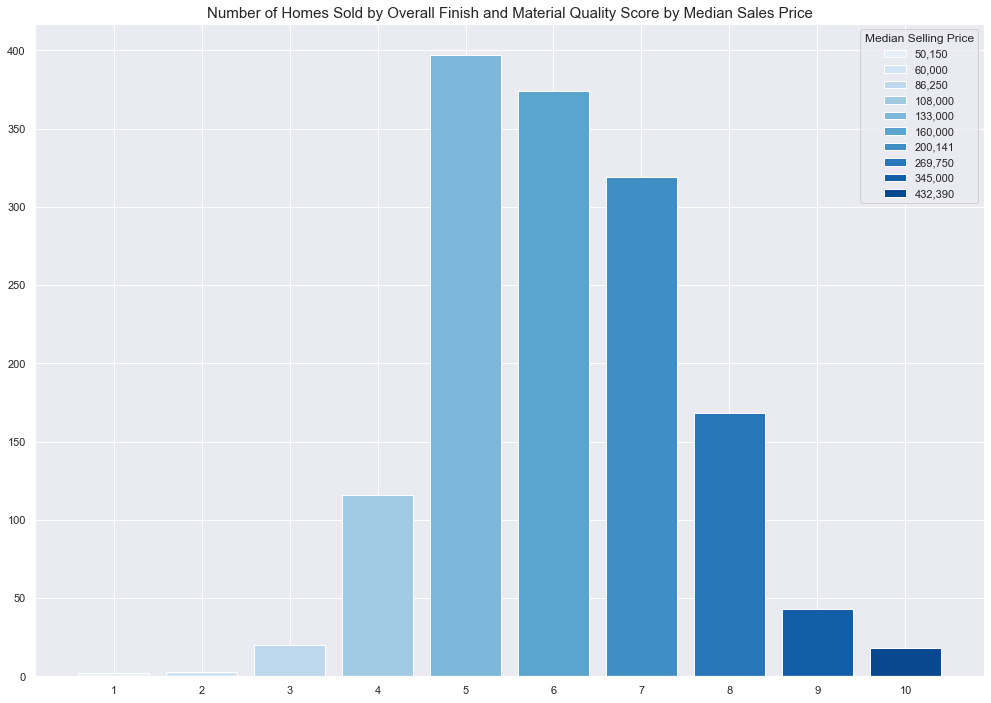

In [222]:
#Overall finish and material quality by median sales price plot by count
oqs = pd.DataFrame(overall_qual_median.groupby(['OverallQual'])['SalePrice'].count()) #set up dataframe for plot
oqs['Count']=oqs['SalePrice']
oqs = oqs.reset_index().drop(columns='SalePrice')

f, ax = plt.subplots(figsize=(17, 12))
oqs_plot = plt.bar(oqs['OverallQual'], oqs['Count'], color=sns.color_palette('Blues', 10)) #plot

plt.legend(oqs_plot,['50,150','60,000','86,250','108,000','133,000','160,000','200,141','269,750','345,000','432,390'],
          title='Median Selling Price')
plt.xticks(np.arange(1,11)) # legend and xlabels

plt.title('Number of Homes Sold by Overall Finish and Material Quality Score by Median Sales Price', fontsize='15')
plt.savefig('Overall Finish and Material Quality Scores by Median Sales Price')

plt.show();

#### Further examination of scatter matrix of top 5 features correlated with sale price show and upward distribution of scatter that wedges outwards. The outward scatter signifies though there is a positive correlation to sales, the wedge indicates outliers.

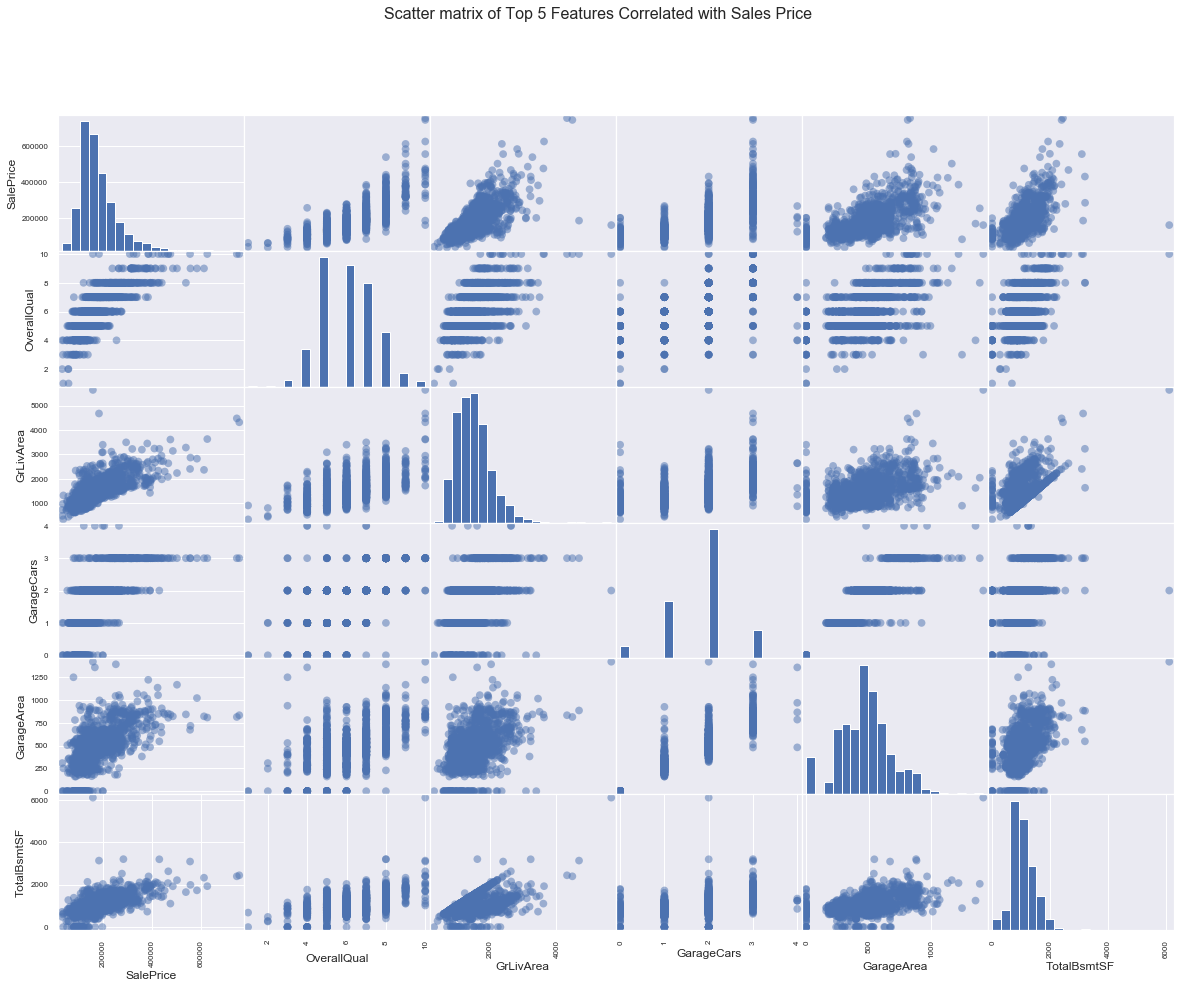

In [223]:
#Scatter matrix of Top 5 Features Correlated with Sales Price
pd.plotting.scatter_matrix(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 
                                  'TotalBsmtSF']], figsize=(20, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.5)

plt.suptitle('Scatter matrix of Top 5 Features Correlated with Sales Price', fontsize=16);
plt.savefig('Scatter matrix of Top 5 Features Correlated with Sales Price')

plt.show();

#### Analysis of distribution curves and scatter plots of sales prices and above grade living area square feet by foundation:
 - It seems that wood foundations by above grade living area square feet is the most normally distributed.
 - Yet it seems that from the scatter plot on the upper right, that most sold homes related to above grade living area square feet that were more than 2000 square feet were made with the foundation labeled PConc.

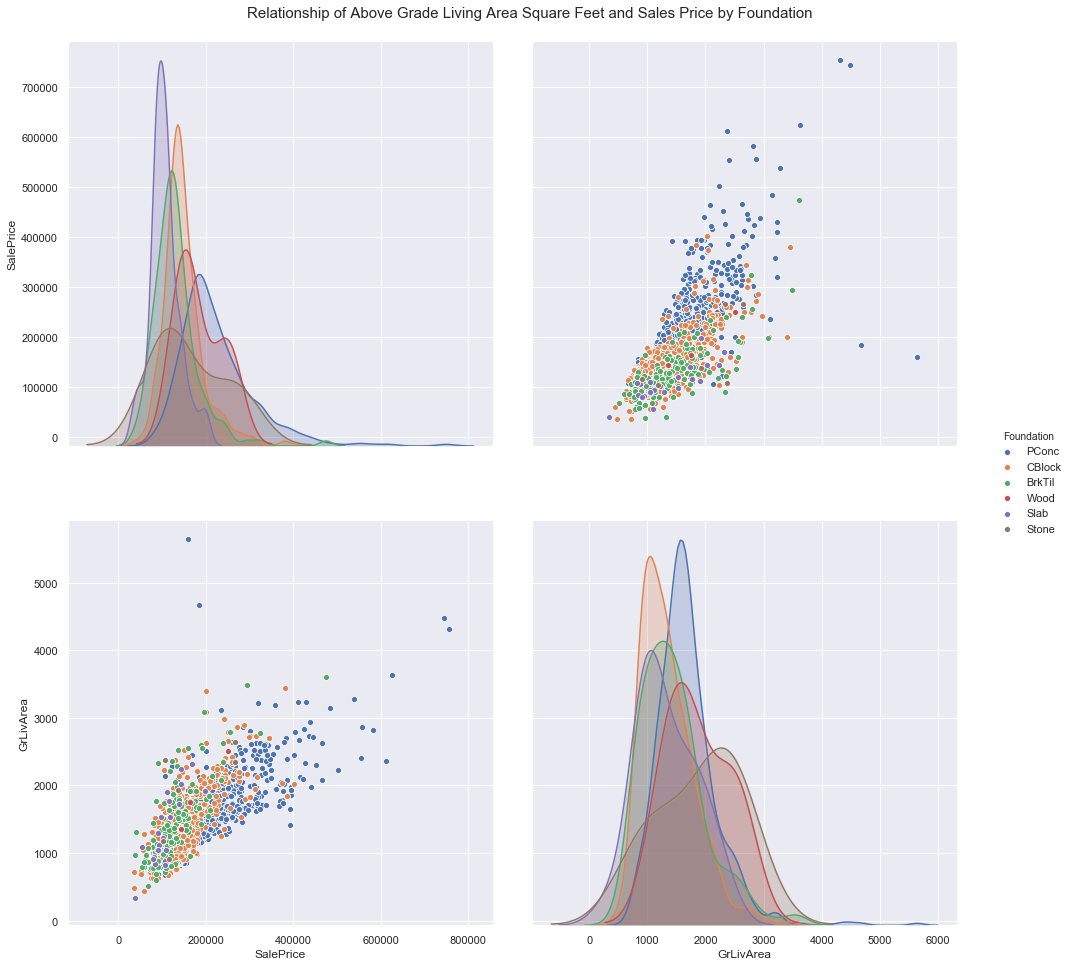

In [431]:
#Pairplot showing relationship of above grade living area square feet and sales price by foundation
overall_qual_plot = sns.pairplot(data = train[['SalePrice', 'GrLivArea', 'Foundation']], hue='Foundation', aspect=2);

overall_qual_plot.fig.set_size_inches(15,15)

plt.suptitle('Relationship of Above Grade Living Area Square Feet and Sales Price by Foundation', fontsize='15')
plt.savefig('Relationship of Above Grade Living Area Square Feet and Sales Price by Foundation')

plt.show();

#### Density plots of the top ten features correlated with price show different distributions. However sales price is heavily skewed to the right. Most features related to square footage are also skewed to the right as well. This may affect home valuation using conventional methods.

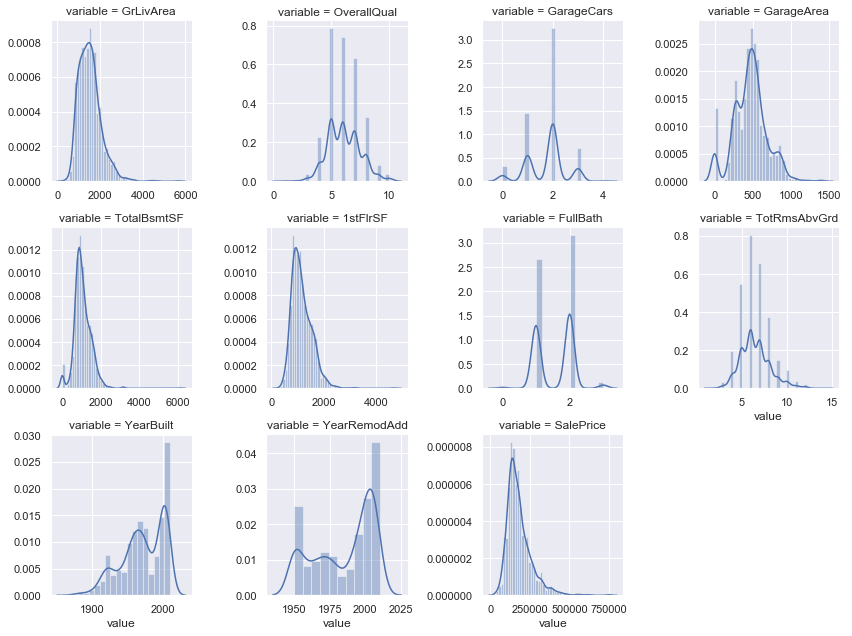

In [432]:
#Density plots for housing data by top ten features correlated with price
#Density function to plot data
def hist_density_plots(data, features):
    d = data
    f = features
    g = pd.melt(d, value_vars = f)
    gm = sns.FacetGrid(g, col='variable', col_wrap = 4, sharex = False, sharey = False)
    gm = gm.map(sns.distplot, 'value')
    sns.set(rc={'figure.figsize':(20,15)})
    plt.show;

#Density Plots
hist_density_plots(train,['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
                    'FullBath', 'TotRmsAbvGrd', 'YearBuilt',  'YearRemodAdd', 'SalePrice'])
plt.savefig('Density Plots for Housing Data by Top Ten Features Correlated with Price');

#### Box plots also show that including sales price, there are outliers that influence the skew of the distributions. This is an indication that the data would need methods to address the outliers either by trimming, scaling, or even using a process called winsorization. 

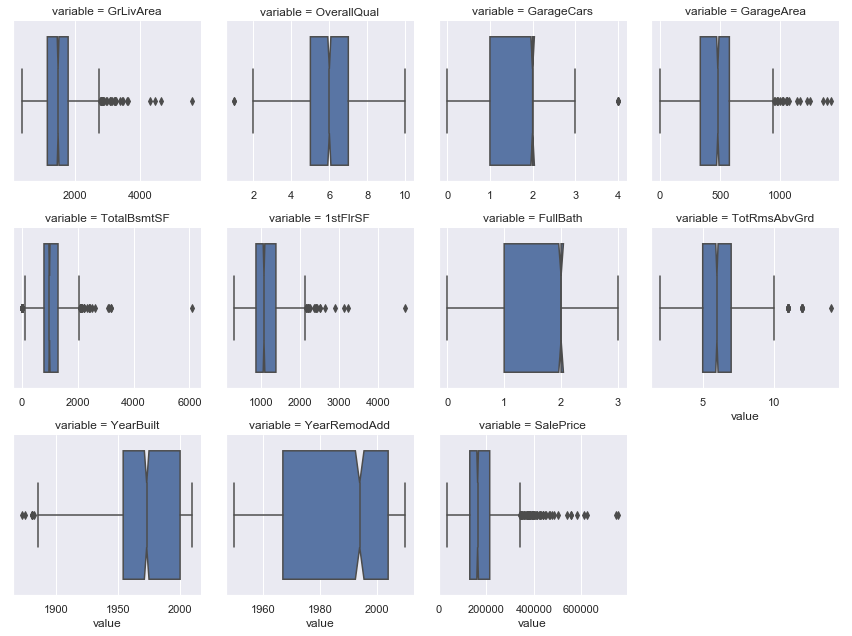

In [433]:
#Box plots for housing data by top ten features correlated with price
#Boxplot function to plot data
def box_plot(data, features):
    d = data
    f = features
    g = pd.melt(d, value_vars = f)
    gm = sns.FacetGrid(g, col='variable', col_wrap = 4, sharex = False, sharey = False)
    gm = gm.map(sns.boxplot, 'value', notch=True)
    sns.set(rc={'figure.figsize':(20,15)})
    plt.show;

#Boxplots
box_plot(train, ['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
                    'FullBath', 'TotRmsAbvGrd', 'YearBuilt',  'YearRemodAdd', 'SalePrice'])  
plt.savefig('BoxPlots');

#### To see how linear models will work on some of the data. It seems that sales price is also related to years remodeled, years built, and of course, above grade living area square feet.

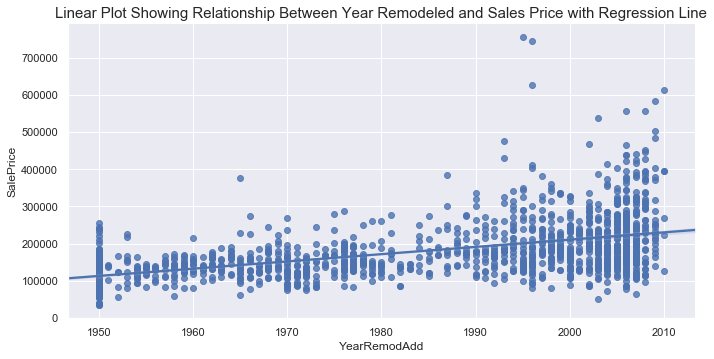

In [434]:
#Linear plot showing relationship between year remodeled and sales price
sns.lmplot('YearRemodAdd', 'SalePrice', data = train, aspect=2);
plt.title('Linear Plot Showing Relationship Between Year Remodeled and Sales Price with Regression Line', 
          fontsize='15')
plt.savefig('Linear Plot Showing Relationship Between Year Remodeled and Sales Price with Regression Line');

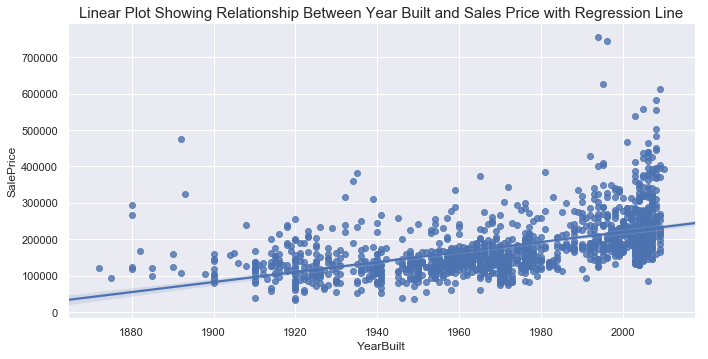

In [435]:
#Linear plot showing relationship between year built and sales price
sns.lmplot('YearBuilt', 'SalePrice', data = train, aspect=2);
plt.title('Linear Plot Showing Relationship Between Year Built and Sales Price with Regression Line', 
          fontsize='15')
plt.savefig('Linear Plot Showing Relationship Between Year Built and Sales Price with Regression Line');

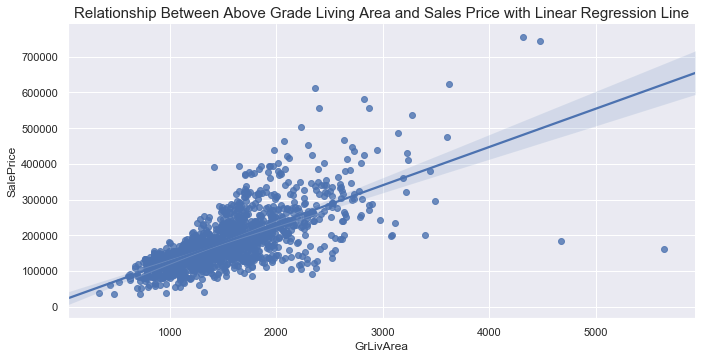

In [436]:
#Linear plot showing relationship between year above grade living area square footage and sales price
sns.lmplot('GrLivArea', 'SalePrice', data = train, aspect=2);
plt.title('Relationship Between Above Grade Living Area and Sales Price with Linear Regression Line', 
          fontsize='15')
plt.savefig('Relationship Between Above Grade Living Area and Sales Price with Linear Regression Line');

#### Sales amount by months and number of sales:
 - Highest number of sales occured in June.
 - Highest total sales amount occured in June with a total of $44,881,121.

In [224]:
#Sales amount by month
train.groupby(['MoSold']).agg({'SalePrice':np.sum}).reset_index()

,MoSold,SalePrice
0,1,10628863
1,2,9249864
2,3,19424916
3,4,24181960
4,5,35150683
5,6,44881121
6,7,43601499
7,8,22527523
8,9,12328042
9,10,15981194


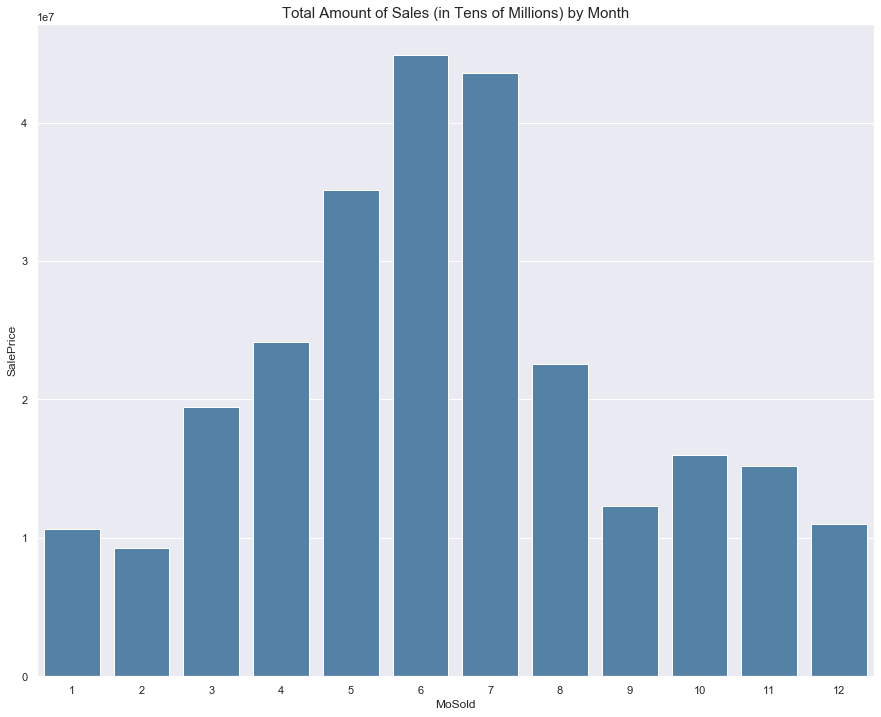

In [242]:
#Months by total selling prices (in tens of millions) showing highest month of selling price in June
f, ax = plt.subplots(figsize=(15, 12))

sns.barplot('MoSold', 'SalePrice', data = train.groupby(['MoSold']).agg({'SalePrice':np.sum}).reset_index(), 
            color='steelblue')

plt.title('Total Amount of Sales (in Tens of Millions) by Month', fontsize='15')
plt.savefig('Total Amount of Sales (in Tens of Millions) by Month')

plt.show();

In [440]:
#Number of Sales by month
pd.DataFrame(train.groupby(['MoSold'])['SalePrice'].count()).reset_index().rename(columns={'SalePrice': 'Count'})

,MoSold,Count
0,1,58
1,2,52
2,3,106
3,4,141
4,5,204
5,6,253
6,7,234
7,8,122
8,9,63
9,10,89


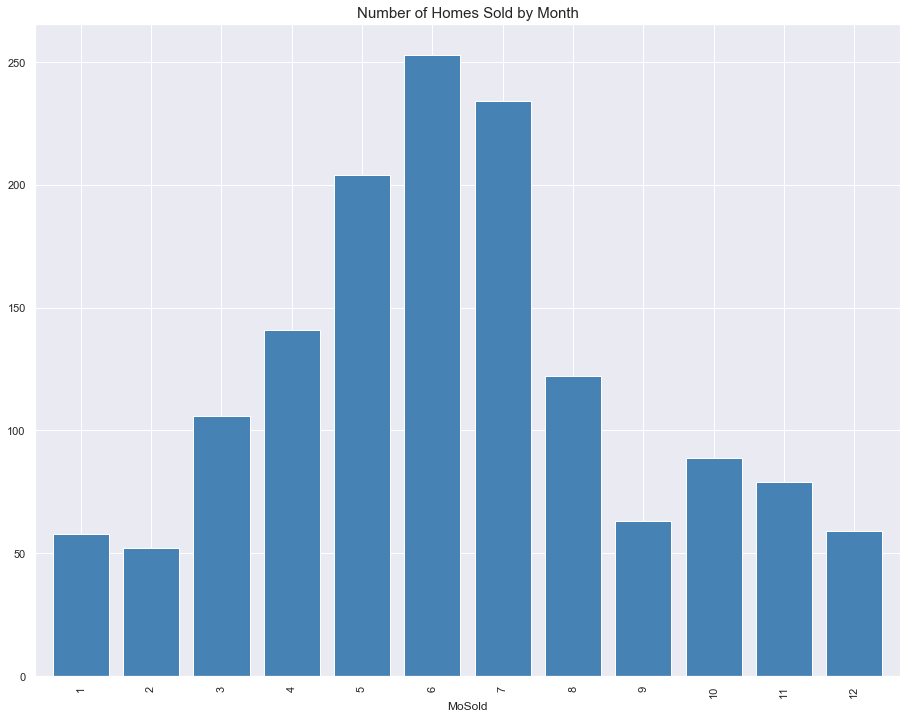

In [245]:
#Number of sales by month plot
train.groupby(['MoSold'])['SalePrice'].count().plot(kind='bar', width=0.8, figsize=(15.5, 12), color='steelblue');

plt.title('Number of Homes Sold by Month', fontsize='15')
plt.savefig('Number of Homes Sold by Month')
plt.show();

#### Sales by Month and Year:
 - By month and year sales seem to instead be highest in both June and July

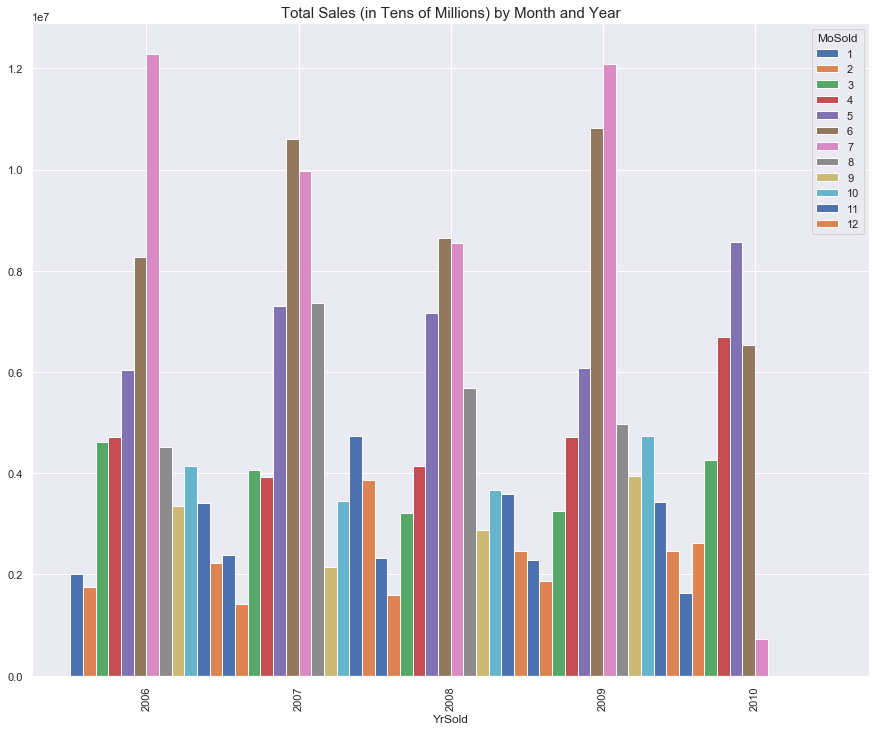

In [249]:
#Sales in tens of millions by Month and Year 
train.groupby(['YrSold', 'MoSold'])['SalePrice'].sum().unstack().plot.bar(figsize=(15,12), width=1)
plt.title('Total Sales (in Tens of Millions) by Month and Year', fontsize=15)
plt.savefig('Total Sales By Month and Year')
plt.show();

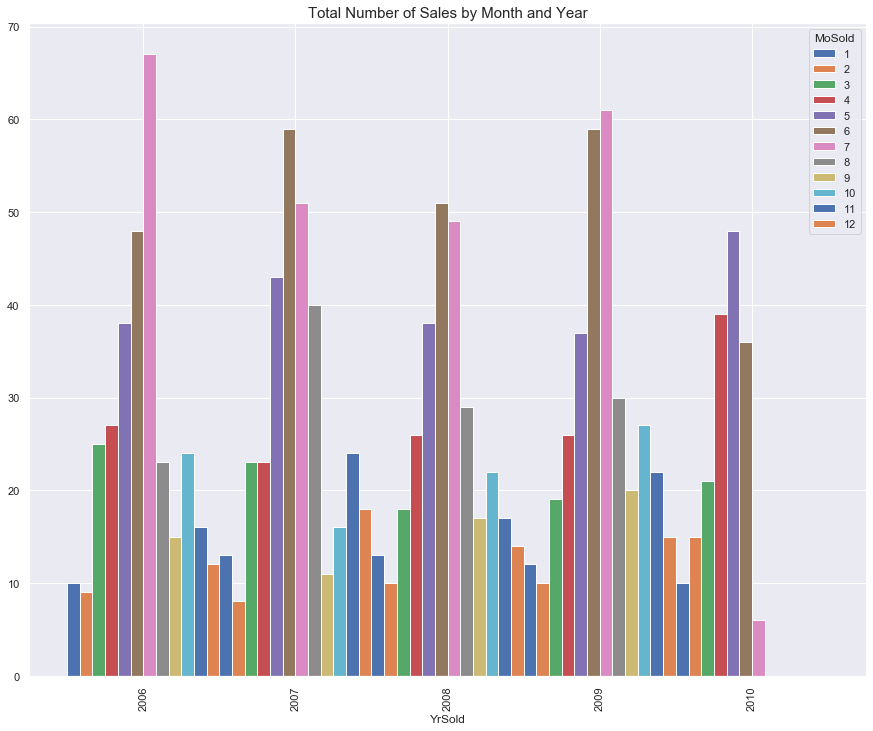

In [247]:
#Number of Sales by Month and Year 
train.groupby(['YrSold', 'MoSold'])['SalePrice'].count().unstack().plot.bar(figsize=(15,12), width=1);
plt.title('Total Number of Sales by Month and Year', fontsize=15)
plt.savefig('Total Number Sales By Month and Year')
plt.show();

#### Median sales, number of sales, and total sales by neighborhood:
 - Highest median sales price show that neighborohoods such as NridgHt, Noridge, Stonebr, and so on may account for a majority of totol sales.
 - However, by number of sales and total sales amounts by neighborhood, numbers show that the highest two neighborhoods were from NAmes and CollgCr, with 225 sales and a total of 32,815,593 for NAmes, and 150 sales and a total of 29,694,866 for CollgCr. The median sales prices for these two were 140,000 and 197,200. Overall materials and finish quality scores had a mean of 5.360 and 6.640, respectively.

In [442]:
#Median sale price by neighborhood
train.groupby(['Neighborhood']).agg({'SalePrice':np.median}).reset_index().sort_values(by='SalePrice', ascending=False)

,Neighborhood,SalePrice
16,NridgHt,315000
15,NoRidge,301500
22,StoneBr,278000
23,Timber,228475
21,Somerst,225500
24,Veenker,218000
6,Crawfor,200624
4,ClearCr,200250
5,CollgCr,197200
0,Blmngtn,191000


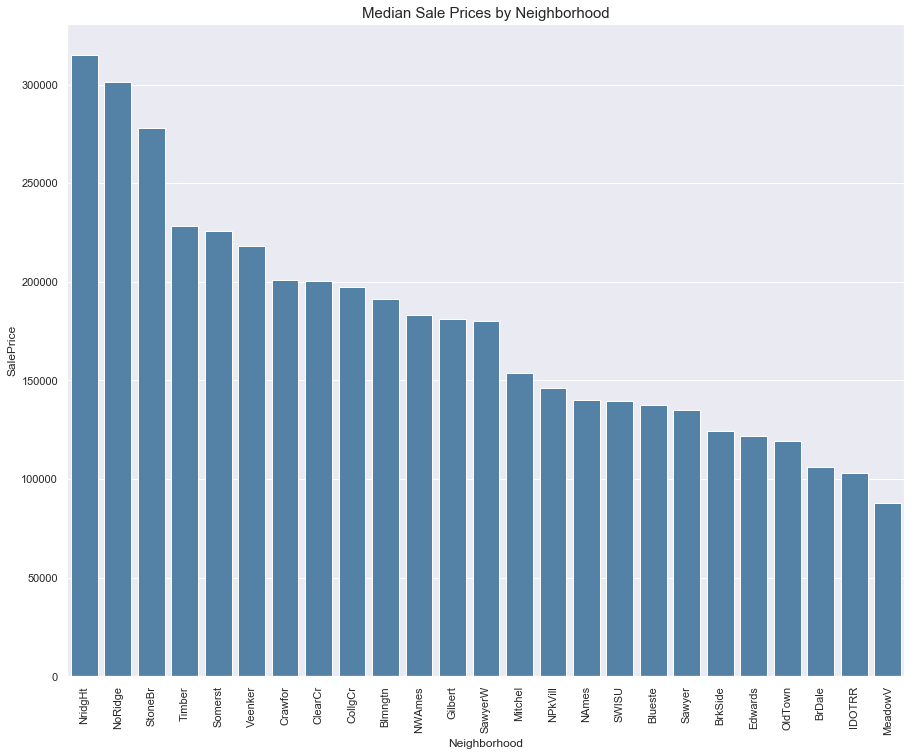

In [250]:
#Median sale price by neighborhood plot
neighborhood = train.groupby(['Neighborhood']).agg({'SalePrice':np.median}).reset_index() #group sales by neighborhood

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')

sns.barplot('Neighborhood','SalePrice',
            data = neighborhood, order=neighborhood.sort_values(by = 'SalePrice', ascending = False)['Neighborhood'], 
            color='steelblue');

plt.title('Median Sale Prices by Neighborhood', fontsize='15')
plt.savefig('Median Sale Prices by Neighborhood')
plt.show();

In [444]:
#Total number of sales by neighborhood with total sales amounts and mean overall qual score
neighborhood_df = pd.DataFrame(train.groupby(['Neighborhood'])['SalePrice'].count().reset_index().rename(columns={'SalePrice': 'Count'}))
neighborhood_df['SalePrice']=train.groupby(['Neighborhood']).agg({'SalePrice':np.sum}).reset_index()['SalePrice']
neighborhood_df['OverallQual']=train.groupby(['Neighborhood']).agg({'OverallQual':np.mean}).reset_index()['OverallQual']
neighborhood_df.sort_values(by='SalePrice', ascending=False)

,Neighborhood,Count,SalePrice,OverallQual
12,NAmes,225,32815593,5.360
5,CollgCr,150,29694866,6.640
16,NridgHt,77,24352838,8.260
21,Somerst,86,19382666,7.337
8,Gilbert,79,15235506,6.557
17,OldTown,113,14489459,5.389
14,NWAmes,73,13800655,6.329
15,NoRidge,41,13747108,7.927
7,Edwards,100,12821970,5.080
20,SawyerW,59,11006792,6.322


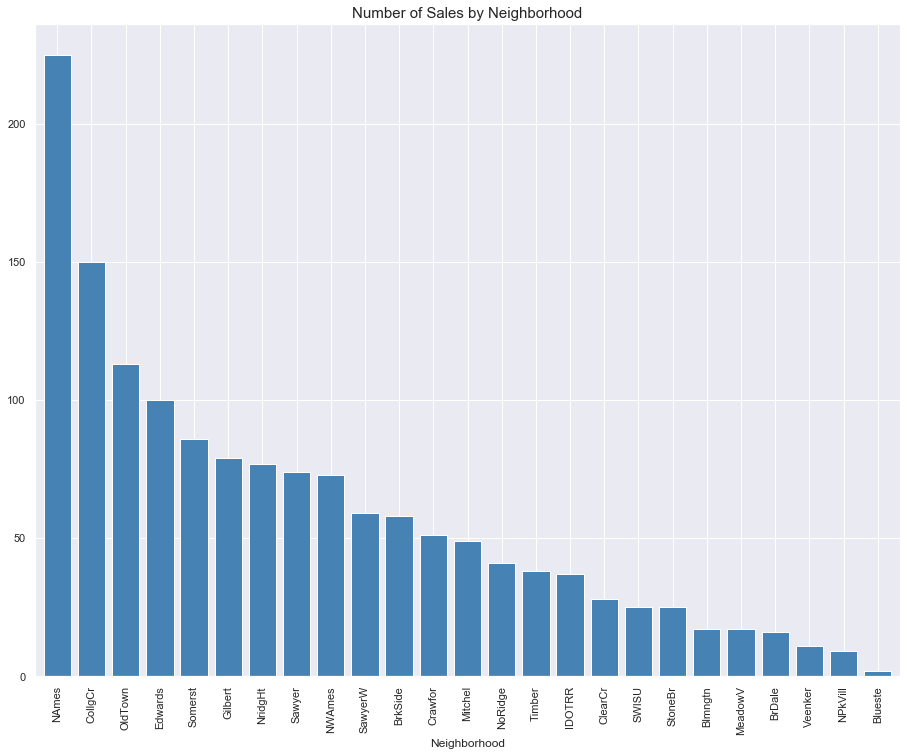

In [251]:
#Number of Sales by Neighborhood
train.groupby(['Neighborhood'])['SalePrice'].count().sort_values(ascending=False).plot(kind='bar', width=0.8, 
                                                                                      figsize=(15.5, 12), 
                                                                                       color='steelblue');

plt.title('Number of Sales by Neighborhood', fontsize='15')
plt.savefig('Number of Sales by Neighborhood')
plt.show();

### Conclusion of Data Exploration:
 - Heatmaps show that there are decent correlations between features such as overall material and finish quality score, above grade living area square feet, and so on. A majority of the top ten correlated features had relations relative to size such as square footage. Statistics also showed that overall material and finish quality scores from 5 and higher accounted for 1319 of training data, which is about 90% of all sales for homes. It is also interesting to note that these were for median years of homes built after 1959. 
 - Density and boxplots showed that are a number of skewed features which need to be addressed. However, initial OLS regressions on a few features seem to show that predictions will fair well using a linear model with the right method. 
 - Number of sales by month and total sales by month were examined which may be useful for sales initiatives. Number of sales and total sales amount by neigborhood were examined and revealed that high median prices of homes seemed to only influence sales moderately, which confirms that median prices still matter in relationship to total sales amounts.  

### Data Preparation:
 - Data will now be prepared for modeling.

### To see how outliers may affect the data, they are checked:
 - There are a few outliers that probably should be removed, yet models may perform badly if there also outliers in the test data. Instead of removing them, data will be scaled to help shape the distributions for modeling.
 - One outlier is checked against selling prices, GrLivArea, as it showed significant outliers in relation to selling price in the scatter matrix. Outliers from here will be removed.
 -  Before modeling, a few extreme outliers are removed from the data.  

In [195]:
#Check for extreme outliers
#Get numeric data
outliers = train._get_numeric_data()

#Get the IQR
q1 = outliers.quantile(0.25)
q3 = outliers.quantile(0.75)
iqr = q3 - q1

#Calculate and total extreme outliers (lower and upper bounds)
mild_lower = (q1 - 1.5 * iqr)
mild_upper = (q3 + 1.5 * iqr)
mild_lower =(outliers < mild_lower).sum()
mild_upper = (outliers > mild_upper).sum()

#Organize and show in table
mild_lower= pd.DataFrame(mild_lower, columns=['Mild_Lower'])
mild_upper = pd.DataFrame(mild_upper, columns=['Mild_Upper'])
mild_outliers = mild_lower.merge(mild_upper, left_index=True, right_index=True)
mild_outliers.sort_values(by='Mild_Upper', ascending=False).head(20)

,Mild_Lower,Mild_Upper
EnclosedPorch,0,208
BsmtFinSF2,0,167
ScreenPorch,0,116
MSSubClass,0,103
MasVnrArea,0,96
OverallCond,31,94
BsmtHalfBath,0,82
OpenPorchSF,0,77
LotArea,2,67
KitchenAbvGr,1,67


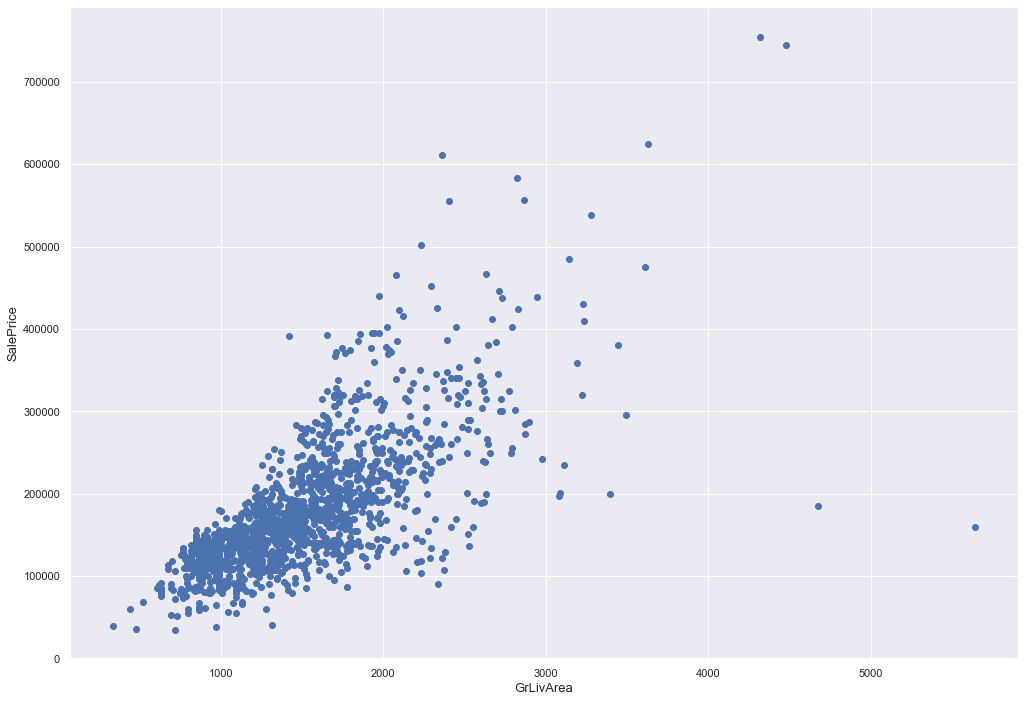

In [252]:
# Outliers in GrLivArea
fig, ax = plt.subplots(figsize=(17, 12))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [4]:
#Trim data with GrLiveArea Above 4500 sq ft.
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

### Prediction Variable - Sales Price:
 - Before any imputation on missing data, since sales price is the target variable for prediction, we will analyze and scale if the distribution is heavily skewed. 

mu = 180932.92 and sigma = 79467.79
Kurtosis = 9.50 and Skewness = 1.88


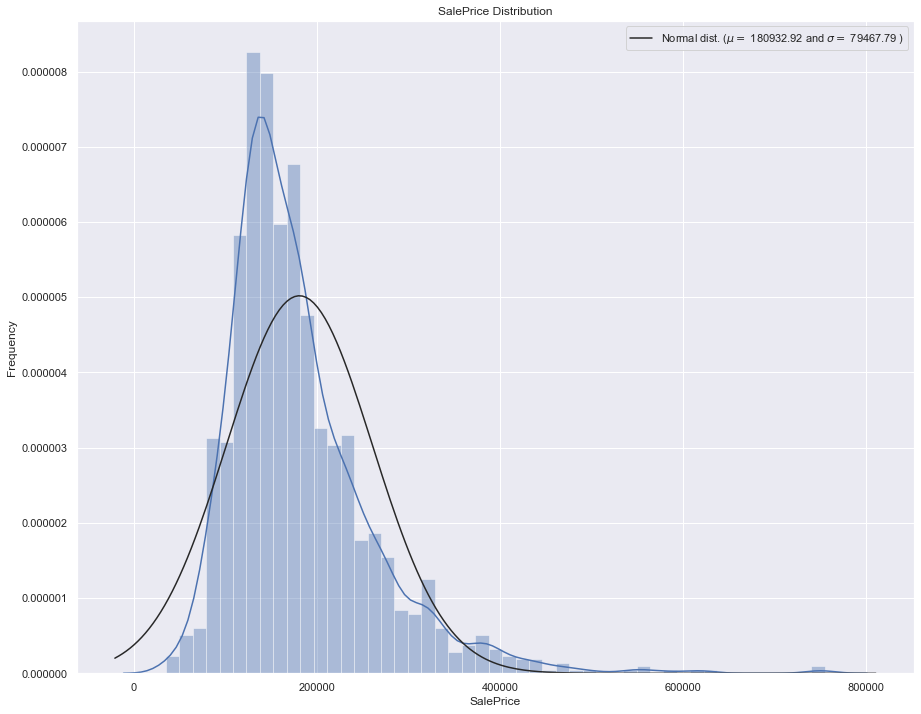

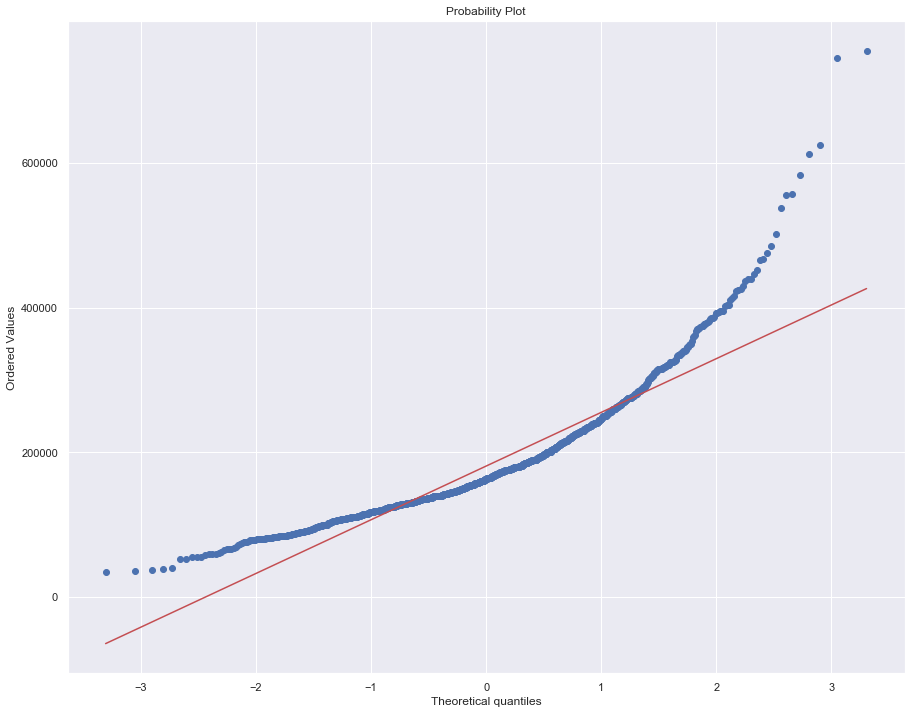

In [254]:
#Fitted parameters for distribution
(mu, sigma) = norm.fit(train['SalePrice'])
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
kurt = kurtosis(train['SalePrice'], fisher=False)
skewness = skew(train['SalePrice'])
print('Kurtosis = {:.2f} and Skewness = {:.2f}'.format(kurt, skewness))

#Plot the distribution
sns.set(rc={'figure.figsize':(15, 12)})
sns.distplot(train['SalePrice'], fit=norm);
sns.set(rc={'figure.figsize':(15, 12)})
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
plt.savefig('SalePrice distribution')

#Plot the QQ-plot
fig = plt.figure()
qqplot = stats.probplot(train['SalePrice'], plot=plt)
plt.savefig('SalePrice distribution QQ')
plt.show()

### The target variable is significantly skewed to the right with a high kurtosis (normal is 3). As linear models do well normally distributed data, we will transform this variable, and make it more normally distributed:

mu = 12.02 and sigma = 0.40
Kurtosis = 3.80 and Skewness = 0.12


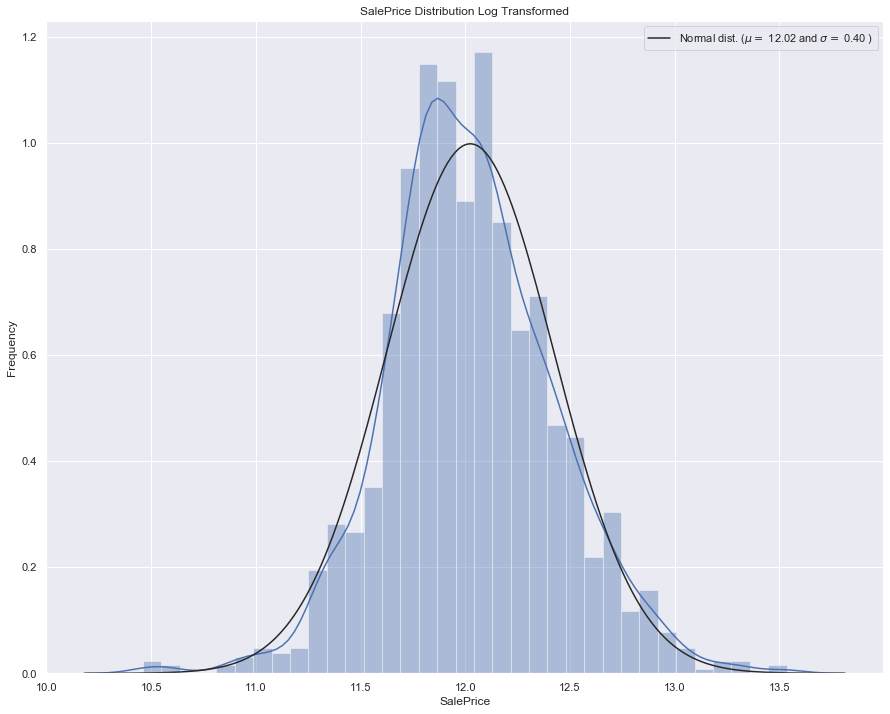

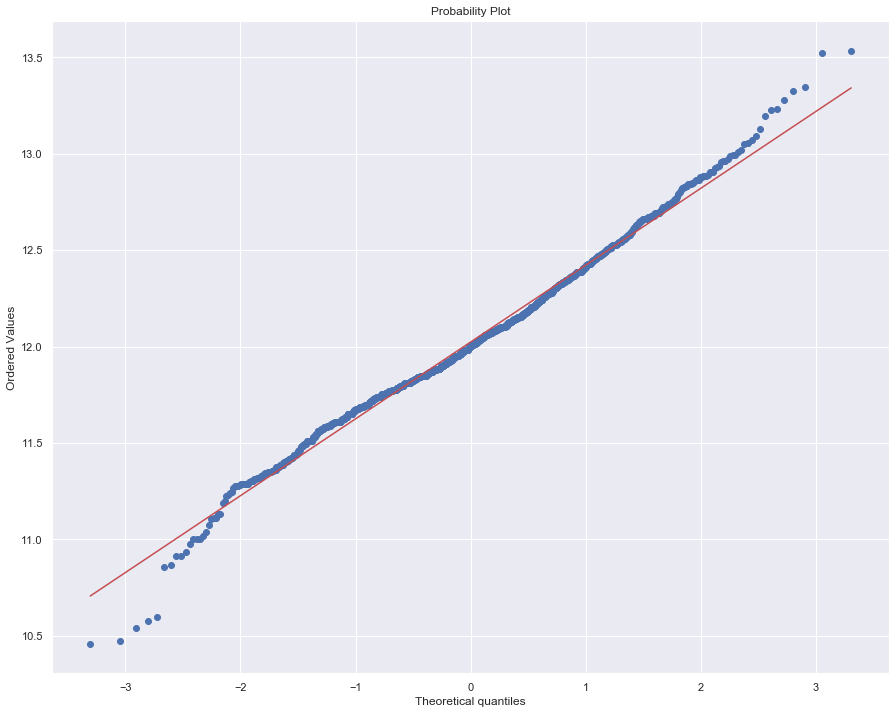

In [5]:
#Numpy fuction log which  applies natural log to all values of the column
train["SalePrice"] = np.log(train["SalePrice"])

#Fitted parameters for distribution
(mu, sigma) = norm.fit(train['SalePrice'])
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
kurt = kurtosis(train['SalePrice'], fisher=False)
skewness = skew(train['SalePrice'])
print('Kurtosis = {:.2f} and Skewness = {:.2f}'.format(kurt, skewness))

#Plot the distribution
sns.set(rc={'figure.figsize':(15, 12)})
sns.distplot(train['SalePrice'], fit=norm);
sns.set(rc={'figure.figsize':(15, 12)})
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution Log Transformed')
plt.savefig('SalePrice distributionlog')

#Plot the QQ-plot
fig = plt.figure()
qqplot = stats.probplot(train['SalePrice'], plot=plt)
plt.savefig('SalePrice distributionqqlog')
plt.show()

### Skewness seems a lot better and data looks normally distributed.

### Data Imputation, Create Categorical Data, and Scale Features: 
 - There are a lot of missing values so this will need to be fixed before modeling.
 - Categorical data will be added based on relevancy.
 - Skewness will be checked on features and will be scaled accordingly.

### Check and Visualize Missing Data:

In [6]:
#Train set and test data merged into same dataframe:
train.reset_index(drop=True, inplace=True)
#For splitting later
atrain = train.shape[0]
atest = test.shape[0]

#Sale price is split into training variable
y_train = train.SalePrice.values

#Merging into single data frame
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("All data size is : {}".format(all_data.shape))

All data size is : (2917, 79)


In [257]:
#Check missing data by ratio
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


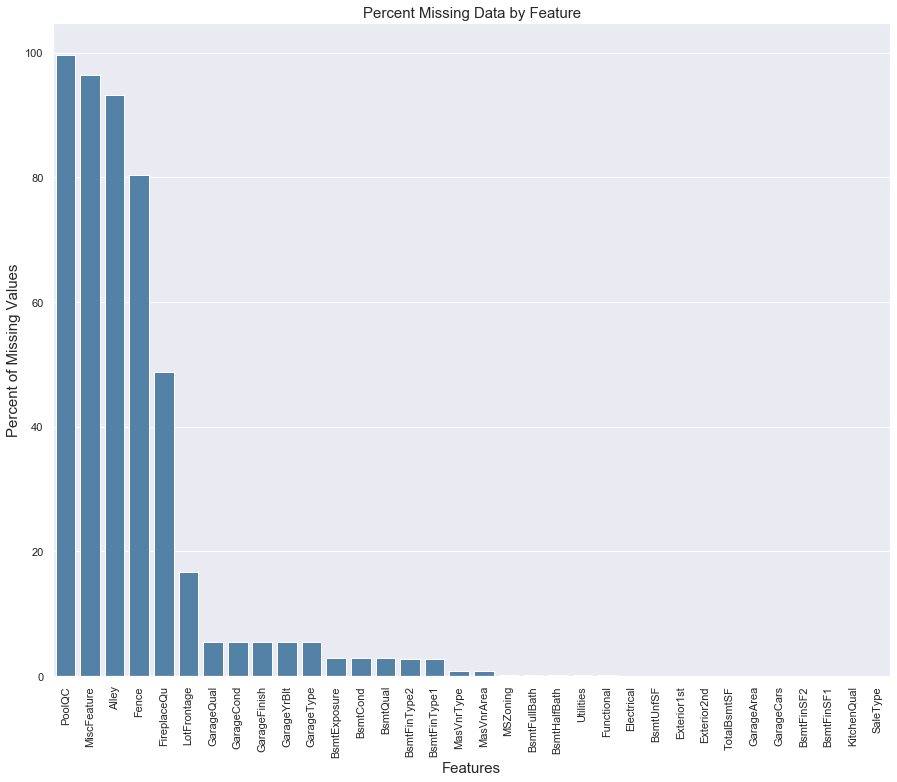

In [258]:
#Visualize missing data by feature (percentage)
f, ax = plt.subplots(figsize=(15, 12))

plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na, color='steelblue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

plt.savefig('Percent Missing Data by Feature')
plt.show();

#### Check Qualitative Features of Missing Data:

In [203]:
#Categorical values of NA features that are not numbers referred to in imputing data 
all_data_na_obj = all_data.select_dtypes(include=['object']).isnull().sum()
all_data_na_obj = all_data_na_obj.drop(all_data_na_obj[all_data_na_obj == 0].index)
all_data_na_categories = {}
for i in range(len(all_data_na_obj)):
    all_data_na_categories[all_data_na_obj.index[i]] = all_data[all_data_na_obj.index[i]].unique()
all_data_na_categories

{'Alley': array([nan, 'Grvl', 'Pave'], dtype=object),
 'BsmtCond': array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object),
 'BsmtExposure': array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object),
 'BsmtFinType1': array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object),
 'BsmtFinType2': array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object),
 'BsmtQual': array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object),
 'Electrical': array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object),
 'Exterior1st': array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
        'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
        'Stone', 'ImStucc', 'CBlock', nan], dtype=object),
 'Exterior2nd': array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
        'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
        'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object),
 'Fence': array([nan, 'MnPrv', 'GdWo

#### Check Quantitative Features:

In [204]:
#Non-categorical values that need to be replaced with a number
all_data_na_int = all_data.select_dtypes(exclude=['object']).isnull().sum()
all_data_na_int = all_data_na_int.drop(all_data_na_int[all_data_na_int == 0].index)
all_data_na_int

BsmtFinSF1        1
BsmtFinSF2        1
BsmtFullBath      2
BsmtHalfBath      2
BsmtUnfSF         1
GarageArea        1
GarageCars        1
GarageYrBlt     159
LotFrontage     486
MasVnrArea       23
TotalBsmtSF       1
dtype: int64

### Imputing Missing Values:

#### PoolQC: NA means "No Pool". 
 - Seems that majority of houses have no pool based on ratio:

In [7]:
#Impute PoolQC with None
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

#### MiscFeature: NA means "No Misc Feature":

In [8]:
#Impute MiscFeature with None
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

#### Alley: NA means "No Alley Access":

In [9]:
#Impute Alley with None
all_data["Alley"] = all_data["Alley"].fillna("None")

#### Fence: NA means "No Fence":

In [10]:
#Impute Fence with None
all_data["Fence"] = all_data["Fence"].fillna("None")

#### FireplaceQu : NA means "No Fireplace":

In [11]:
#Impute Fence with None
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#### LotFrontage: 
 - Area of each property most likely have a similar area to other houses in respective neighborhood, NAs are filled with median LotFrontage by neighborhood.

In [12]:
#Group by neighborhood and fill in missing value by the median LotFrontage
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#### GarageType, GarageFinish, GarageQual and GarageCond : Imputed Data with None

In [13]:
#GarageType, GarageFinish, GarageQual and GarageCond Imputed with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

#### GarageYrBlt, GarageArea and GarageCars : Imputed Data with 0

In [14]:
#GarageYrBlt, GarageArea and GarageCars Imputed Data with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : Imputed Data with 0 (No Basement)

In [15]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath Imputing Data with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
 - They are caterogical so filled with None

In [16]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 imputed with None
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#### MasVnrArea and MasVnrType: Imputed Data with 0 and  None as Probably Means No Veneer

In [17]:
#MasVnrArea and MasVnrType imputed with 0 and None
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#### MSZoning: Imputed with Most Occuring

In [18]:
#MSZoning imputed with most occuring
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#### Utilities: Almost all records are AllPub. This column is dropped as it does not seem to have value.

In [19]:
#Count of categories for utilities
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [20]:
#Utilities dropped
all_data = all_data.drop(['Utilities'], axis=1)

#### Functional: Imputed with Most Occuring

In [21]:
#Functional Imputed with Most Occuring
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

#### Electrical: Imputed with Most Occuring

In [22]:
#Electrical Imputed with Most Occuring
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#### KitchenQual: Imputed with Most Occuring

In [23]:
#KitchenQual Imputed with Most Occuring
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#### Exterior1st and Exterior2nd: Imputed with Most Occuring

In [24]:
#Exterior1st and Exterior2nd Imputed with Most Occuring
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#### SaleType: Imputed with Most Occuring

In [25]:
#SaleType Imputed with Most Occuring
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#### Check For Missing Values:

In [26]:
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index)
all_data_na.sum()

0

#### Drop Other Features:
 - PoolQC had a lot of values that are none so this will be dropped.
 - Street is either paved or gravel, and like utilities, it does not seem valuable for modeling 

In [27]:
all_data = all_data.drop(['Street', 'PoolQC'], axis=1)

In [28]:
# Savng copy before going any further for decision trees
rfr_data = all_data.copy()

### Create Categorical Data:

#### Check to see if numerical data can be transformed to categorical:

In [248]:
#Looking at features to see if any numerical data can be transformed to categorical
numeric = all_data.select_dtypes(exclude=['object']).transpose().index
numeric_category = {}
for i in range(len(numeric)):
    if len(all_data[numeric[i]].unique()) < 20:
        numeric_category[numeric[i]] = all_data[numeric[i]].unique()
numeric_category

{'BedroomAbvGr': array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64),
 'BsmtFullBath': array([0.99343976, 0.        , 1.97805079, 2.9569719 ]),
 'BsmtHalfBath': array([0.        , 0.71089529, 1.14364215]),
 'Fireplaces': array([0.        , 0.90333407, 1.68825447, 2.40497629, 3.07491097]),
 'FullBath': array([2, 1, 3, 0, 4], dtype=int64),
 'GarageCars': array([2., 3., 1., 0., 4., 5.]),
 'HalfBath': array([1.06883652, 0.        , 2.23719666]),
 'KitchenAbvGr': array([0.75095685, 1.24854329, 1.63056506, 0.        ]),
 'OverallCond': array([3.99151663, 6.0000325 , 4.67950029, 5.34804015, 3.28009995,
        1.76035961, 2.53943935, 6.63766875, 0.92640135]),
 'OverallQual': array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64),
 'PoolArea': array([0.        , 5.43088498, 5.60685368, 5.51909624, 5.49133031,
        5.44107804, 5.70322644, 4.45237069, 5.1811385 , 5.3235558 ,
        4.81279794, 5.49937385, 5.76272589]),
 'TotRmsAbvGrd': array([2.26196796, 1.99657727, 2.13736936, 2.37375282, 1.

#### MSSubClass, YrSold, and MoSold Transformed to Categorical for Dummy Creation Later:
 - Building class (MSSubClass), year sold, and month are more or less categories that will be useful in dummy creation.

In [29]:
#Transform Numerical Features to Categorical Data

#MSSubClass: The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Scaling Features:
 - Features have a bit of skewness so they will be transformed using the Box-Cox method, which is good for significantly skewed variables. 
 - Transformed features presented less skewing than original data, though skewing is still significant with a number of features. 

#### Check Skewness:

In [282]:
#Get numeric data from features
features_numeric =  all_data.dtypes[all_data.dtypes != "object"].index

#Check the skewness of all numerical features
skewed_feats = all_data[features_numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()

,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372


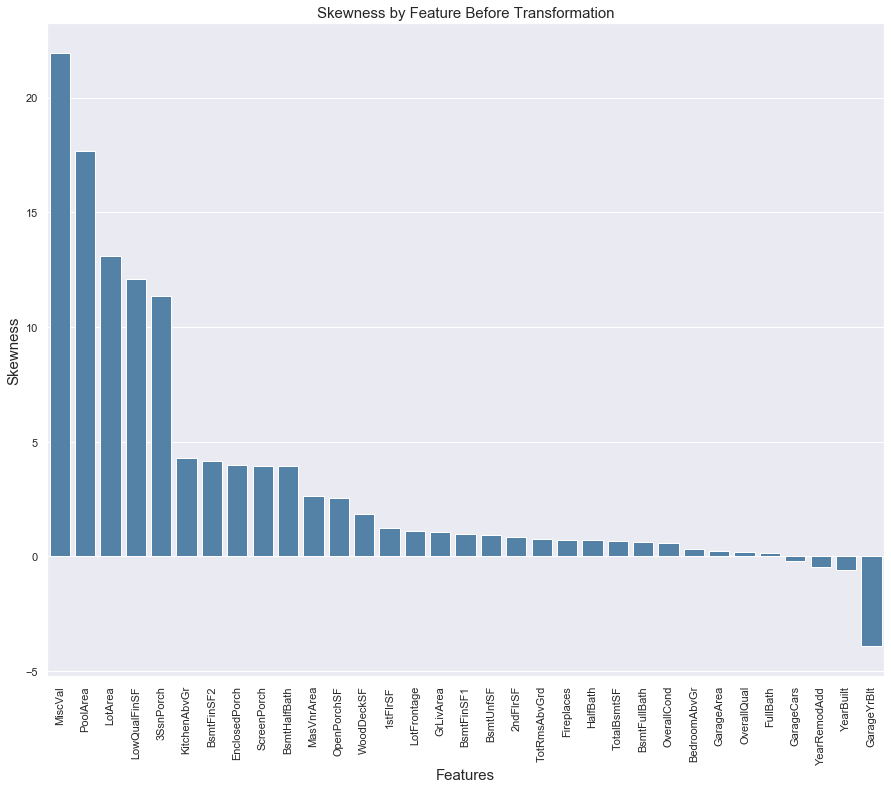

In [283]:
#Plot of feature skewness' before transformation
f, ax = plt.subplots(figsize=(15, 12))

plt.xticks(rotation='90')
plt.yticks(np.arange(-25, 25, 5))
sns.barplot(x=skewness.index, y=skewness['Skew'], color='steelblue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness by Feature Before Transformation', fontsize=15)

plt.savefig('Skewness by Feature Before Transformation')
plt.show();

In [30]:
#Scale features using Box Cox Tranformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = all_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i] + 1))

In [31]:
#Check skewness again
#Get numeric data from features
features_numeric =  all_data.dtypes[all_data.dtypes != "object"].index

#Check the skewness of all numerical features
skewed_feats = all_data[features_numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()

,Skew
PoolArea,15.595
3SsnPorch,8.862
LowQualFinSF,8.493
MiscVal,5.238
BsmtHalfBath,3.779


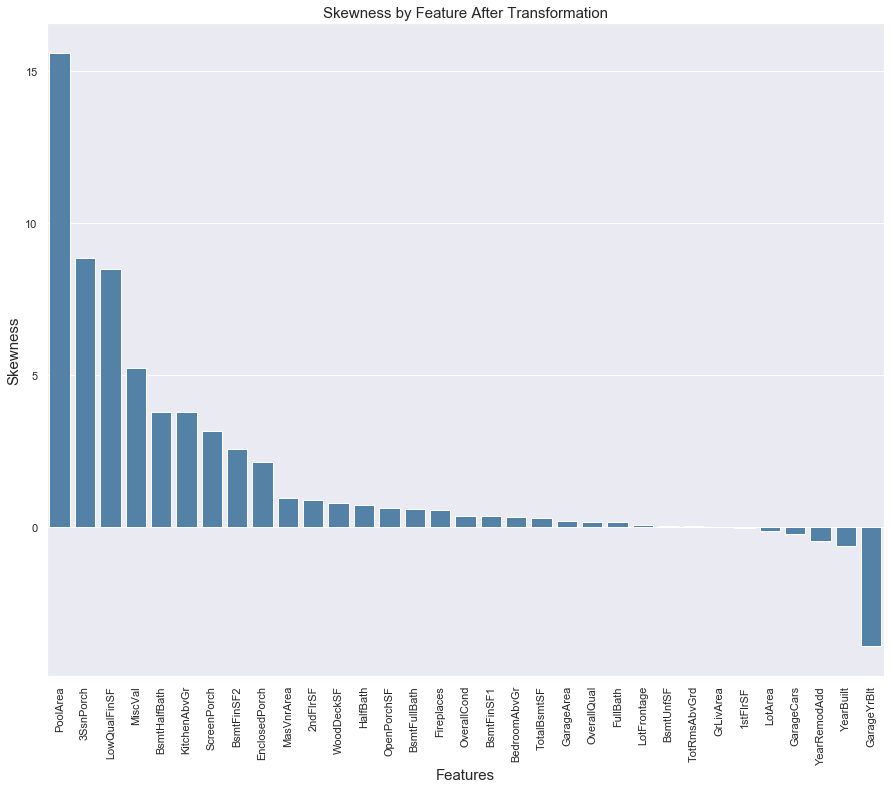

In [286]:
#Plot of feature skewness' before transformation
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
plt.yticks(np.arange(-25, 25, 5))
sns.barplot(x=skewness.index, y=skewness['Skew'], color='steelblue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness by Feature After Transformation', fontsize=15)

plt.savefig('Skewness by Feature After Transformation')
plt.show();

#### Scaling of feature using Box-Cox transformation seemed to have helped some. Features will be scaled again before running the models as well. 

### Add Additional Features :
 - Year built and remodeled.
 - Total square footage of house.
 - Total square footage of floors.
 - Total bathrooms.
 - Total porch square feet.
 - Whether or not the home has a pool, 2nd floor, garage, basement, or fireplace.

In [32]:
#Year Built and Remodeled
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

In [33]:
#Total square footage of house 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [34]:
#Total Square footage of floors
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + 
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

In [35]:
# Total Bathrooms
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

In [36]:
#Total porch squarefeet
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

In [37]:
#Whether or not the house has pool, 2nd floor, garage, basement, fireplace
all_data['Haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['Has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['Hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['Hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['Hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
all_data.shape

(2917, 86)

In [39]:
rfr = all_data.copy()

#### Dummy Creation:
 - Values from qualitative features are extracted and expanded to additional features which are also transformed to binary for modeling

In [40]:
#Create dummies so qualitative features are transformed to numeric for modeling
final_data = pd.get_dummies(all_data).reset_index(drop=True)
final_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,5.939,1025.652,0.000,3,144.118,0.000,0.993,0.000,29.991,0.000,...,0,0,0,0,1,0,0,1,0,0
1,6.235,0.000,0.000,3,181.719,0.000,0.000,0.711,44.135,0.000,...,0,0,0,0,1,0,1,0,0,0
2,5.994,1040.521,0.000,3,110.441,0.000,0.993,0.000,56.897,0.000,...,0,0,0,0,1,0,0,1,0,0
3,6.028,904.477,0.000,3,61.795,0.000,0.993,0.000,64.809,16.021,...,0,0,0,0,1,1,0,0,0,0
4,6.161,1273.025,0.000,4,136.625,0.000,0.993,0.000,61.166,0.000,...,0,0,0,0,1,0,0,1,0,0


In [41]:
final_data.shape

(2917, 333)

### Get New Train and Test Sets for Modeling:

In [42]:
train = final_data[:atrain]
test = final_data[atrain:]

#### Eliminate Outliers that Will Affect Modeling and Recurrent Values that Are Repeated Most That May Enhance Overfitting: 

In [251]:
# Test for outliers
import statsmodels.api as sm
ols = sm.OLS(endog = y_train, exog = train)
fit = ols.fit()
test2 = fit.outlier_test()['bonf(p)']

D:\python3\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
D:\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
D:\python3\lib\site-packages\statsmodels\stats\multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
D:\python3\lib\site-packages\statsmodels\stats\multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [300]:
# List of outliers to be removed

outliers = list(test2[test2 < 0.0002].index)

outliers

[30, 88, 462, 631, 1322]

In [43]:
#Remove outlier rows
outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])
y_train = np.delete(y_train,[outliers])

#Checks if the most recurrent value of the feature is repeated almost in all the instances 
overfit = []
for i in train.columns:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
#Drop columns that will overfit
train = train.drop(overfit, axis=1)
test = test.drop(overfit, axis=1)

In [44]:
train.shape, y_train.shape, test.shape

((1453, 332), (1453,), (1459, 332))

### Modeling Using Different Methods (Unregularized Linear Regression, Ridge Regression, Lasso Regression, Random Forests, Extra Trees, Gradient Boosting, and Voting Regressor):
 - The main objective of this study was to retest housing data taken from residential home sales in Ames, Iowa from the years 2006 to 2010. Data was tested utilizing 7 methods: OLS (Ordinary Least Squares) regression without regularization, ridge regression, lasso regression, random forests, extra trees, and regression using a voting regressor.
 - Models were tested using a 10 fold cross-validation design. Method of cross-validation used was K-fold cross-validation, which randomly splits a training set into 10 distinct subsets called folds, then trains and evaluates the model n (i.e. 10) times, picking a different fold for evaluation every time and training on the other n (i.e. 9) folds.
 - Results showed that using a voting regressor utilizing ridge and lasso regression in its ensemble performed the best as the training set scored with an average RMSE of around 0.0997413 within a 10 fold cross-validation design, and scored with an RMSE of 0.11621 on the test set.

#### Import Libraries

In [45]:
#Libraries for modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import learning_curve

In [46]:
#Function for learning curve and plotting for mean training scores versus validation by training set size
def learning_plot(model, X_train, y_train, ylim1, ylim2, title):
    #Model learning curve with parameters
    train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, 
                                                             scoring='neg_mean_squared_error', cv=10, random_state=1)
    
    #RMSE of train scores and cross-validation scores by training set size
    train_scores = np.sqrt(-train_scores)
    valid_scores = np.sqrt(-valid_scores)
    
    #Mean and standard deviations
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    #Plot figures. Fill between shows shading of mean-std, and mean+std
    f, ax = plt.subplots(figsize=(15, 12))
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, ##For shading
                     color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g") ##For shading
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(ylim1,ylim2)
    plt.legend()
    plt.title(title, fontsize='15')
    
    plt.savefig(title)
    plt.show();
    return

#### Scaling:
 - Although features were scaled using Box Cox transformation, as features were expanded using dummy creation, training and test data are scaled again.
 - For scaling, a robust scaler was used, as there are features that are still significantly skewed, indicating outliers, even after Box-Cox transformation was performed. The centering and scaling statistics of the robust scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. The robust scaler scales based off the quartiles of distributions, and it captures the outliers. It is not as sensitive to outliers such as in min-max and standard scaling.

In [47]:
#Scaling data
scaler = RobustScaler()

X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

### Models Using Linear Regression, Ridge Regression, Lasso Regression, Random Forests, Extra Trees, Gradient Boosting, and Voting Regressor:

### Linear Regression Models:

#### Linear Regression (Unregularized):
 - Linear modeling makes its predictions by computing a weighted sum of input features plus a constant called the bias term (or intercept). 
 - The general prediction formula for a linear model is as follows: ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
 -  Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the regression targets, y, on a training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.
 - However, linear models perform well with qualitative features in large datasets. Yet if there are not enough features, a linear model is at risk of underfitting, where the model will not generalize well to new data.
 - If there are not a tremendous amount of features, linear models also work fast.
 - Results below showed that while the intial RMSE on training data performed very well at 0.08016, it was apparent that the model overfit the data, as it does not generalize well when tested with cross-validation, which had a mean RMSE of 0.1113. With the average RMSE, this model seems to be okay, but when looking at the learning curve with different training set sizes (131,  427,  722, 1018, 1314), the average RMSE from cross-validation starts off extremely high with smaller data sets and gets lower as it trains on more data. However, this is not the case with the training scores without cross-validation. This is a sign of overfitting, the gap between the curves start out significantly wide, though they get closer as it trains on larger sets.  
 - It is also important to note that given a few set of features, linear models run fast, as shown in the execution time below in milliseconds.

In [48]:
#Linear Modeling using linear regression with Cross Validation and Score Results (noting execution time)
start = timer()#timer start
linear = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)
end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
linear_pred = linear.predict(X_train)
linear_rmse = np.sqrt(mean_squared_error(y_train, linear_pred))

#Cross validation with MSE
cv_scores = cross_val_score(linear, X_train, y_train, scoring = 'neg_mean_squared_error',
                           cv=10)

#Convert to RMSE and print # of features, scores, mean, and std 
cv_scores = np.sqrt(-cv_scores)
print("Number of features used:", np.sum(linear.coef_ != 0))
print('\n Initial RMSE on Training Data:', linear_rmse)
print('\n Cross Validation Scores: \n', cv_scores)
print('\n Mean of Scores: \n', cv_scores.mean())
print('\n Standard Deviation of Scores: \n', cv_scores.std())
print('\n Execution time in milliseconds:', exec_time)

Number of features used: 332

 Initial RMSE on Training Data: 0.08016201833667706

 Cross Validation Scores: 
 [0.10342461 0.10293299 0.11336018 0.11327466 0.13384121 0.10972501
 0.12161934 0.09271978 0.10182324 0.12066084]

 Mean of Scores: 
 0.11133818428563932

 Standard Deviation of Scores: 
 0.011313231323004547

 Execution time in milliseconds: 49.10759999998504


#### Learning Curve: Unregularized Linear
 - Model shows signs of overfitting

In [260]:
# Training set sizes for learning curve (determined below)
train_sizes, train_scores, valid_scores = learning_curve(linear, X_train, y_train, scoring='neg_mean_squared_error', 
                                                         cv=10, random_state=42)
   
print('Training set sizes:', train_sizes)

Training set sizes: [ 130  424  718 1012 1307]


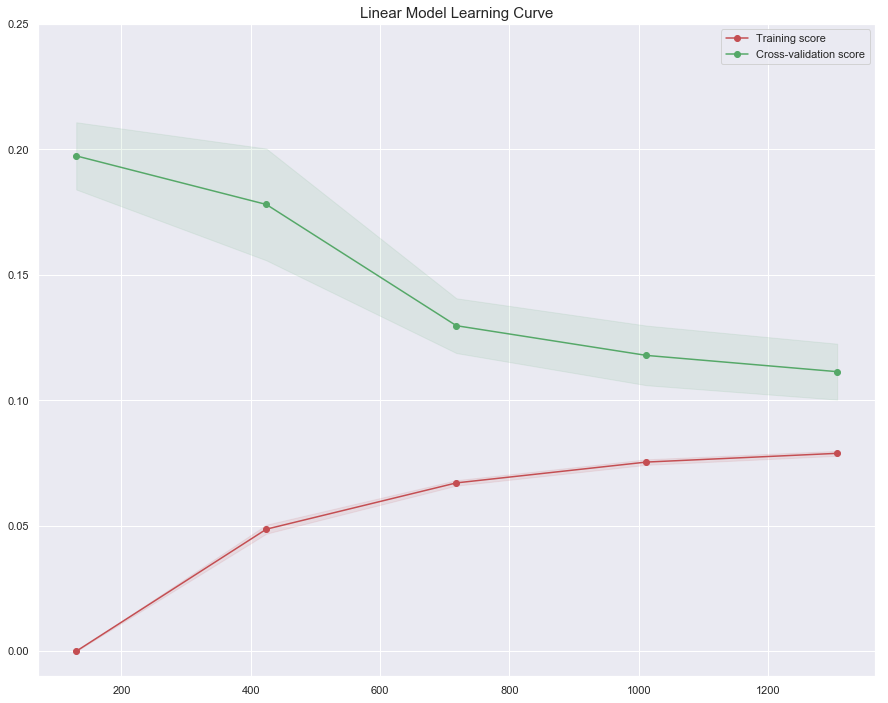

In [271]:
# Learning curve plot showing gap between training scores and cross validation scores by training set size, linear
#unregularized
learning_plot(linear, X_train, y_train, -0.01, 0.25, 'Linear Model Learning Curve')

#### Coefficients Sorted by Highest Magnitude: Unregularized Linear 

In [50]:
#Coefficients sorted by highest values, unregularized linear
linear_coef = pd.DataFrame([train.columns, linear.coef_]).transpose()
linear_coef = linear_coef.rename(columns={0: 'Features', 1: 'Coefficients'})
linear_coef = linear_coef.loc[linear_coef['Coefficients']!=0]
linear_coef.sort_values(by='Coefficients', ascending=False).head(20)

,Features,Coefficients
34,TotalSF,22364168008.677
35,Total_sqr_footage,21801632931.322
26,PoolArea,0.835
178,GarageQual_Ex,0.326
94,Condition2_PosA,0.296
300,RoofMatl_Membran,0.289
311,RoofStyle_Shed,0.271
54,BsmtCond_Po,0.174
203,HouseStyle_1.5Unf,0.155
167,Functional_Typ,0.129


#### Ridge Regression (Regularized) (Kaggle Score 0.11626):
 - As the linear model showed signs of overfitting, a method in linear modeling used to combat overfitting is to regularize the model. Ridge regression is also a linear model for regression, that uses the same formula to make predictions as in OLS (Ordinary Least Squares). However, in ridge regression, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. The magnitude of coefficients are also made as small as possible. That is, all entries of w should be close to zero. Therefore, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. Constraining the model is called regularization. Regularization means to explicitly restrict a model to avoid overfitting. 
 - The particular kind used by ridge regression is known as L2 regularization, where ridge penalizes the L2 norm of the coefficients, or the Euclidean length of (w).
 - Results showed that the training RMSE was higher than the unregularized linear model. This is consistent with our expections, as the unregularized linear model was overfitting the data, the ridge method of regularization is a more restricted model, so it is less prone to overfit. Therefore, a less complex model means worse performance on a training set, but will generalize better. 
 - Regularization models such as ridge regression make a trade-off between the simplicity of a model (coefficients near zero) and its performance on a training set. The significance that the model places on simplicity depends on the alpha parameter. In the method used, our alpha was set to 10. The higher the alpha, the closer coefficients will get to zero, and will eventually become a flat line going through the mean if it is set to high. Alternatively, the lower the alpha, the coefficients will get closer to an unregularized model. After some manual tweaking, an alpha of 10 showed the best results.
 - Cross validation scores showed a mean RMSE of 0.10136, which is better than the 0.111338 mean RMSE that the unregularized model produced.
 - The learning curve for ridge regularization showed a much narrower gap than the unregularized model. This is an indication that the model generalizes well, even when the training set was set to 424.
 - In comparing the size of the coefficients, the unregularized linear model (coefficients shown above) had coefficients with severely high magnitudes, while regularization with the ridge method was much lower (largest at 0.092).
 - It is therefore recommended that the ridge method should be used over an unregularized linear model.

In [49]:
#Linear Modeling using ridge regression with Cross Validation and Score Results
ridge = Ridge(alpha=10, solver='cholesky', fit_intercept=True, normalize=False, random_state=1).fit(X_train, y_train)

#RMSE on Training Prediction
ridge_pred = ridge.predict(X_train)
ridge_rmse = np.sqrt(mean_squared_error(y_train, ridge_pred))

#Cross validation with MSE
cv_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error',
                           cv=10)

#Convert to RMSE and print # of features, scores, mean, and std 
cv_scores = np.sqrt(-cv_scores)
print('Number of features used:', np.sum(ridge.coef_ != 0))
print('\n Initial RMSE on Training Data:', ridge_rmse)
print('\n Cross Validation Scores: \n', cv_scores)
print('\n Mean of Scores: \n', cv_scores.mean())
print('\n Standard Deviation of Scores: \n', cv_scores.std())

Number of features used: 332

 Initial RMSE on Training Data: 0.08603587242683627

 Cross Validation Scores: 
 [0.09013064 0.09305612 0.10173622 0.1081594  0.12153779 0.09981578
 0.11172215 0.08778254 0.09361037 0.10609764]

 Mean of Scores: 
 0.10136486514365324

 Standard Deviation of Scores: 
 0.010125104173375001


#### Learning Curve: Ridge Regression:
 - Less overfitting
 - Seems to generalize well

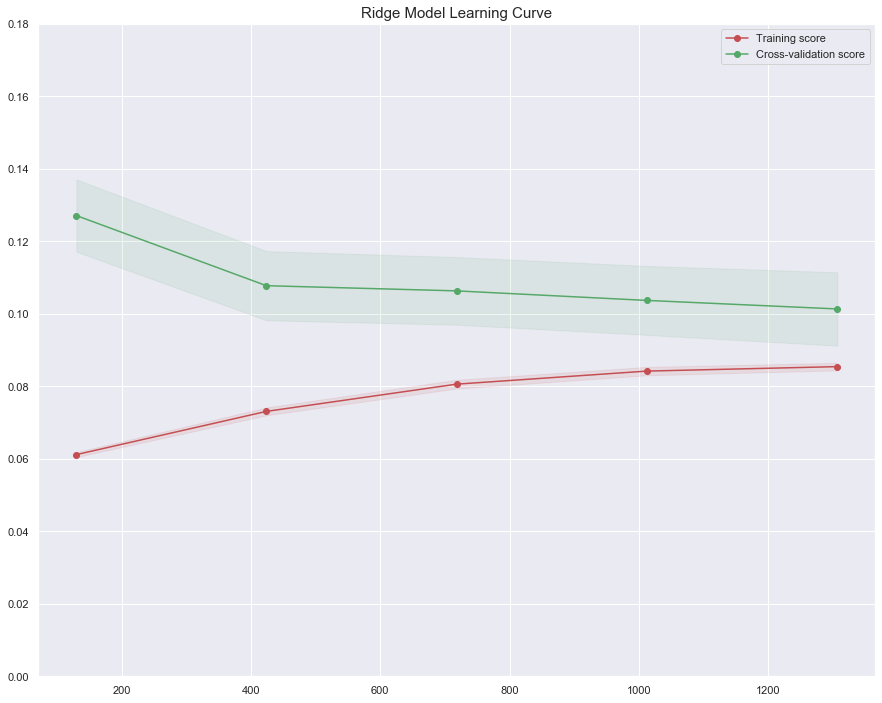

In [309]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, ridge
learning_plot(ridge, X_train, y_train, 0, 0.18, 'Ridge Model Learning Curve')

#### Coefficients Sorted by Highest Magnitude: Ridge Regression
 - Much smaller than unregularized linear
 - Are more in line with correlation heat map to sales in data analysis.

In [52]:
#Coefficients sorted by highest values, ridge
ridge_coef = pd.DataFrame([train.columns, ridge.coef_]).transpose()
ridge_coef = ridge_coef.rename(columns={0: 'Features', 1: 'Coefficients'})
ridge_coef = ridge_coef.loc[ridge_coef['Coefficients']!=0]
ridge_coef.sort_values(by='Coefficients', ascending=False).head(20)

,Features,Coefficients
25,OverallQual,0.092
15,GrLivArea,0.081
277,Neighborhood_Crawfor,0.077
293,Neighborhood_StoneBr,0.070
167,Functional_Typ,0.069
0,1stFlrSF,0.066
116,Exterior1st_BrkFace,0.063
31,YearBuilt,0.063
29,TotalBsmtSF,0.058
34,TotalSF,0.047


#### Lasso Regression (Regularized) (Kaggle Score 0.11739):
 - The third method that was used, which is an alternative to the ridge method for regularizing linear regression is the lasso method. As with ridge regression, lasso also restricts coefficients to be close to zero, but differently. It uses L1 regularization, which penalizes the L1 norm of the coefficient vector, or the sum of the absolute values of the coefficients. The major difference in using L1 regularization is that some coefficients are exactly zero, which means some features are completely ignored from the model. Therefore, an important characteristic of lasso regression is that it completely eliminates the weights of the least important features. In a sense, this method automatically performs feature selection and outputs a sparse model. Having some coefficients be exactly zero often makes the model much easier to interpret, which can reveal the most important features of the model.
 - Using the lasso method, results showed that the average score using a 10 fold cross-validation design was around 0.09942, and it was the best scoring model out of the three. The initial RMSE was around 0.09045, which was similar to the initial RMSE of the ridge (0.08603).
 - Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed to 0. The higher the alpha more features will be set to zero, and less features will be used. This can result in underfitting, which means that the training set did not score well, which will not generalize well either. In the method that we used, alpha was set to 0.0005, which resulted in 110 out of 332 features. The method was also tested against multiple alphas, and results showed that 0.0005 was in fact the best parameter.
 - However, the learning curve had a wider gap with smaller sizes of training data between training scores and cross-validation scores when compared to the model using the ridge method. The wider gap may indicate that the lasso method does not generalize as well as the ridge method, which is also supported by the overall score on the test data. 
 - Coefficients used in the model using lasso also show that the ones used with the largest magnitude are almost the same as the highest correlated features to sales reviewed prior. This further supports the notion that this model is a good choice.
 - Plot showing magnitude of coefficients with this method shows that not all features are set to zero, and features that ared used are spread closer together than coefficients of features used by unregularized linear regression and the ridge method. 

In [50]:
#Linear Modeling using lasso regression with Cross Validation and Score Results
lasso = Lasso(alpha=0.0005, max_iter=100000, fit_intercept=True, normalize=False, random_state=1).fit(X_train, y_train)

#RMSE on Training Prediction
lasso_pred = lasso.predict(X_train)
lasso_rmse = np.sqrt(mean_squared_error(y_train, lasso_pred))

#Cross validation with MSE
cv_scores = cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error',
                           cv=10)

#Convert to RMSE and print # of features, scores, mean, and std 
cv_scores = np.sqrt(-cv_scores)
print("Number of features used:", np.sum(lasso.coef_ != 0))
print('\n Initial RMSE on Training Data:', lasso_rmse)
print('\n Cross Validation Scores: \n', cv_scores)
print('\n Mean of Scores: \n', cv_scores.mean())
print('\n Standard Deviation of Scores: \n', cv_scores.std())

Number of features used: 110

 Initial RMSE on Training Data: 0.09044659954407196

 Cross Validation Scores: 
 [0.0886165  0.09107027 0.10113268 0.10269287 0.12277702 0.09605659
 0.11038609 0.08624548 0.09142246 0.10379547]

 Mean of Scores: 
 0.09941954214817952

 Standard Deviation of Scores: 
 0.010648334424414657


#### Learning Curve: Lasso Regression:
 - Less overfitting than unregularized linear, but not as ridge
 - Gap narrows more than ridge as data set grows larger 
 - Seems to generalize well after training set size of 722

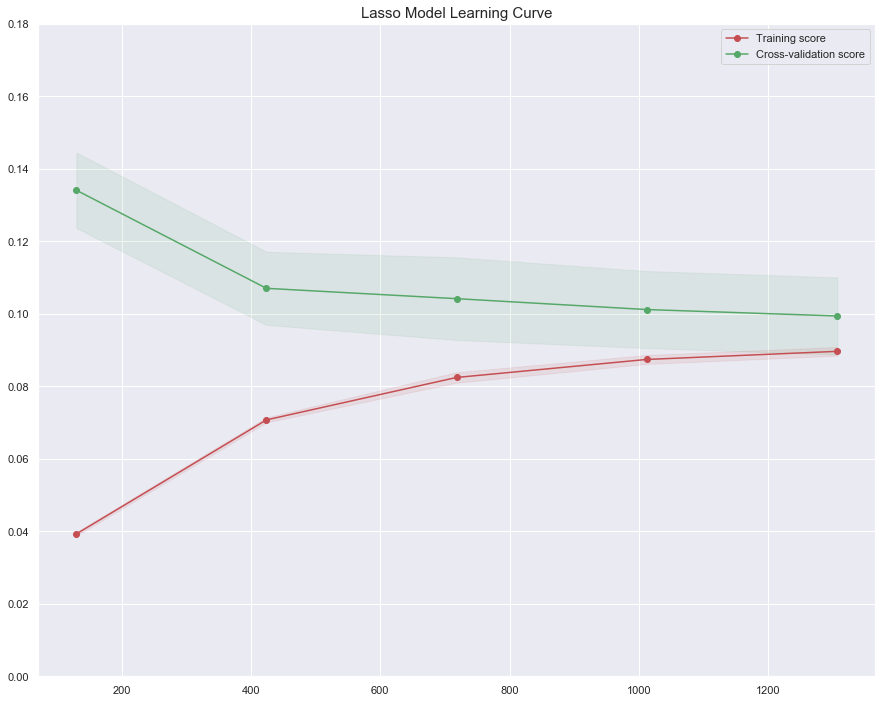

In [272]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, lasso
learning_plot(lasso, X_train, y_train, 0, 0.18, 'Lasso Model Learning Curve')

#### Coefficients Sorted by Highest Magnitude: Lasso Regression
 - Much smaller than unregularized linear
 - Are more in line with correlation heat map to sales in data analysis.
 - Total SF of 1st floor, 2nd floor, and basement has highest magnitude, which makes sense.

In [311]:
#Coefficients sorted by highest values, lasso
lasso_coef = pd.DataFrame([train.columns, lasso.coef_]).transpose()
lasso_coef = lasso_coef.rename(columns={0: 'Features', 1: 'Coefficients'})
lasso_coef = lasso_coef.loc[lasso_coef['Coefficients']!=0]
lasso_coef.sort_values(by='Coefficients', ascending=False).head(20)

,Features,Coefficients
34,TotalSF,0.105
25,OverallQual,0.104
277,Neighborhood_Crawfor,0.092
0,1stFlrSF,0.082
293,Neighborhood_StoneBr,0.075
116,Exterior1st_BrkFace,0.075
15,GrLivArea,0.073
167,Functional_Typ,0.067
31,YearBuilt,0.059
210,KitchenQual_Ex,0.058


#### Lasso Seems to Perform the Best, Checking If There is a Better Alpha to Use:
 - Results show that an alpha of 0.0005 is the best with 103 features.

In [274]:
#Linear Modeling using lasso regression using multiple alphas with Cross Validation and Score Results
lassocv = LassoCV(n_alphas=100, alphas=[0.0001, .0005, .0010, .01], max_iter=1000, cv=10, 
                  random_state=42).fit(X_train, y_train)

#Cross validation with MSE
cv_scores = cross_val_score(lassocv, X_train, y_train, scoring = 'neg_mean_squared_error',
                           cv=10)

#Convert to RMSE and print # of features, scores, mean, and std 
cv_scores = np.sqrt(-cv_scores)
print("Number of features used:", np.sum(lassocv.coef_ != 0))
print('\n Cross Validation Scores: \n', cv_scores)
print('\n Mean of Scores: \n', cv_scores.mean())
print('\n Standard Deviation of Scores: \n', cv_scores.std())

Number of features used: 110

 Cross Validation Scores: 
 [0.0886165  0.09107027 0.10113268 0.10269287 0.12277702 0.09605659
 0.11038609 0.08624548 0.09142246 0.10379547]

 Mean of Scores: 
 0.09941954216040558

 Standard Deviation of Scores: 
 0.01064833442103403


#### Coefficient Magnitude with The Three Models:
 - Unregularized linear show coefficients with higher magnitude. Showing that the model is highly unregularized.
 - Ridge shows significantly smaller magnitude, with similar predictive performance as lasso, but using ridge all coefficients are nonzero.
 - Lasso shows the smallest amount of magnitude with many features at zero. Usually ridge is a first choice between the three models, yet in this case there are a lot of features. Lasso shows that there are features with magnitude, but they are not as spread out as the other two.

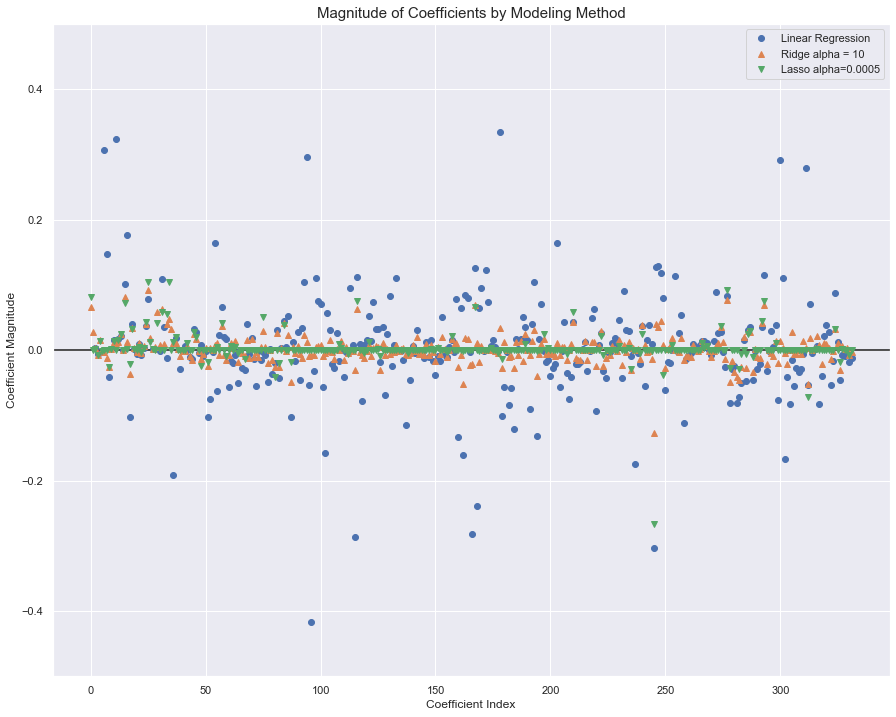

In [312]:
# Plotting the coefficients
f, ax = plt.subplots(figsize=(15, 12))

plt.plot(linear.coef_, 'o', label="Linear Regression")
plt.plot(ridge.coef_, '^', label="Ridge alpha = 10")
plt.plot(lasso.coef_, 'v', label="Lasso alpha=0.0005")

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-.5, .5)
plt.legend()
plt.title('Magnitude of Coefficients by Modeling Method', fontsize='15')

plt.savefig('Magnitude of Coefficients by Method')
plt.show();

### Random Forests and Gradient Boosting:

####  Random Forests:
 - Random Forests work by training many Decision Trees on random subsets of features, then averaging out their predictions.
 - Decision trees use a CART (Classification And Regression Tree) algorithm, which splits the training set into two subsets using a single feature and a threshold, searches for the pair that produces the purest subsets.
 - Once the training set is split into two, it splits subsets using the same logic, and then the next subsets recursively.
 - It will stop splitting until it has reached its max depth or if it cannot find a split that will reduce impurity.
 - Random forests are an ensemble of decision trees, where they introduce randomness when growing trees, as they will search for the best feature among a random subset of features.
 - They use a soft voting strategy, which provides a probability for each possible output label, and the probabilities predicted by all trees are averaged where the class with the highest probability is predicted.
 - Trees and random forests are generally superior to other machine learning models, as they are scale and location invariant.
 - They generally provide better predictions, as single trees split data on nonlinear points to categorize perfectly.
 - In addition, they split data on arbitrary variables at their max purity, and they continue to split based on purity leading to the best prediction possible. 
 -  In contrast to linear regression models, that use a weighted sum of input features, regression tree models base their splits off the greatest separation between the sum of squared errors. Therefore, response variables are based off of residuals rather than weights. 
 - However, there are some drawbacks to trees and random forests. If the size of explanatory variables is large, there is risk of the model not choosing the most relevant variables.
 - They also do not tend to perform well on high dimensional, sparse data, such as text data.
 - Random forests require a lot of memory and are slower to train as well. There is a lot of tuning that is involved, as the number of features used can easily lead to underfitting or overfitting.
 - Therefore, trees and random forests may not be the best choice in a variety of use cases, though overall, they are one of the most powerful models to use.
 - It is always best to compare these models with other models when performing predictive analyses.
 - In this case, using the random forest modeling method did not perform better; however, results were acceptable.
 - Reasons may be that the model is too complex, where features create too much "noise". The size of explanatory variables were large, and the model may have had difficulty choosing the most relevant variables.
 - Another reason was that there may have not been enough data to train on. . Random forests is a greedy algorithm. Hence, it is data-hungry.
 - Results show that a simpler model such as linear modeling is sufficient as scores show clear signs of overfitting.
 - Results also showed that the model took around 2,000 milliseconds to run. Much higher than linear regression, which was almost instant.
 - However, contrary to linear regression models, as coefficients are hard to interpret, examining selected feature importances with trees and random forests can give valuable insights.
 - Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples.

### Random Forest Using Data Prepared for Linear Modeling (Kaggle Score 0.14018) :

In [124]:
#Modeling using Random Forest regressor with Cross Validation and Score Results (noting execution time)
start = timer()#timer start

rfr = RandomForestRegressor(n_estimators=300, max_features=100, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1).fit(X_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
rfr_pred = rfr.predict(X_train)
rfr_rmse = np.sqrt(mean_squared_error(y_train, rfr_pred))

#Cross validation with MSE
scores = cross_val_score(rfr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', rfr_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.046365603576021416

 List of the cross validation scores: 
 [0.1087149  0.11753273 0.13173718 0.13171466 0.15171856 0.10766003
 0.13123809 0.1152036  0.11848485 0.12713485]

 Mean of scores: 
 0.12411394603992254

 Standard Deviation of scores: 
 0.012649245778038571

 Execution time in milliseconds: 2166.907199999514


#### Feature Importances:
 - Feature importances are close to the correlation results in relation to sales explored previously.
 - Shows that the model may generalize well training with more data.
 - Examining the output of each feature’s importance reveal key insights on which explanatory variables are the most important in predicting home prices.
 - Although scores were not better than ridge and lasso regression, features of highest importance are somewhat similar to the highest coefficients with positive values from both linear regression models. 


In [172]:
features = pd.DataFrame([train.columns, rfr.feature_importances_]).transpose()
features = features.rename(columns={0: 'Feature', 1: 'Importances'})
features.sort_values(by='Importances', ascending=False).head(10)

,Feature,Importances
25,OverallQual,0.229
15,GrLivArea,0.120
31,YearBuilt,0.059
33,YrBltAndRemod,0.056
36,Total_Bathrooms,0.050
112,ExterQual_TA,0.045
29,TotalBsmtSF,0.038
0,1stFlrSF,0.034
12,GarageArea,0.032
13,GarageCars,0.032


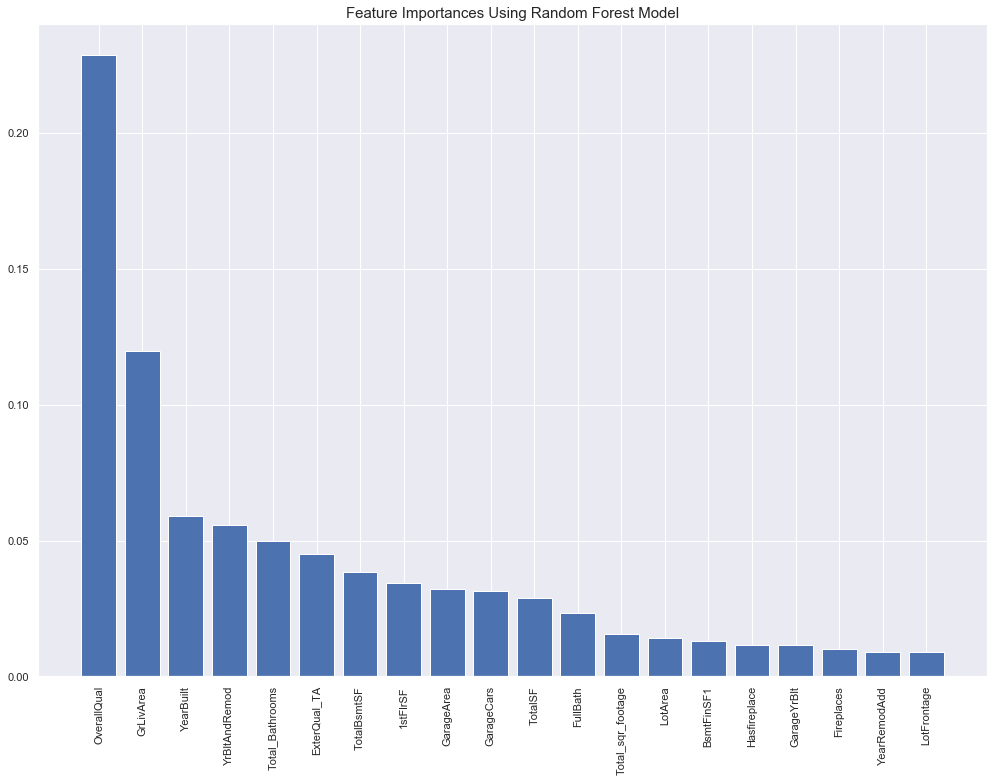

In [175]:
features_plot = features.sort_values(by='Importances', ascending=False).head(20)
f, ax = plt.subplots(figsize=(17, 12))
plt.xticks(rotation='90')
plt.bar(features_plot['Feature'], features_plot['Importances'])
plt.title('Feature Importances Using Random Forest Model', fontsize=15)
plt.savefig('Feature Importances Using Random Forest Model')
plt.show();

#### Learning Curve Random Forest:
 - There is a large gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model.
 - Sign that either more data is required or features need to be reduced. In a much larger training set, the two curves would continue to get closer.

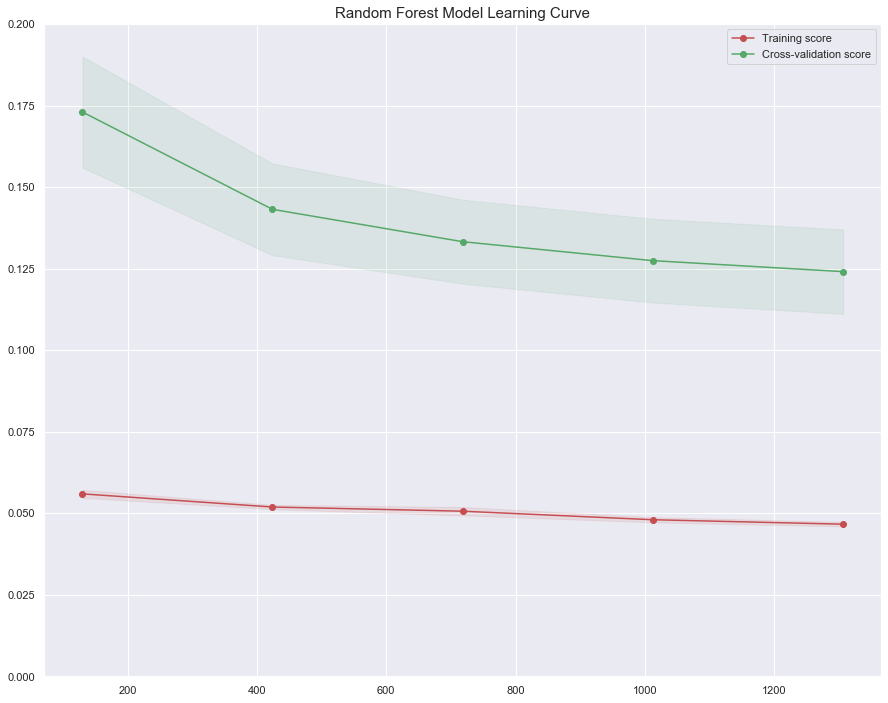

In [191]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, random forest
learning_plot(rfr, X_train, y_train, 0, 0.20, 'Random Forest Model Learning Curve')

#### Random Forest Using Feature Selection From Select Model Using SKlearn: 
 - To test the model even more, feature selection was used based on the lowest threshold from the original model.
 - Features are reduced from 332 explanatory variables, to 50.
 - However, the scores did not improve.
 - Scores still showed signs of overfitting.
 - Examining feature importances shows that it seems that less relevant variables were selected, as variables used had smaller correlations to sales.

In [101]:
#Feature selection using sklearn
rfr_feat = RandomForestRegressor(n_estimators=300, max_features=100, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1)

sfm = SelectFromModel(rfr_feat, threshold=0.001)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features=100,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=300, n_jobs=-1,
                                                oob_score=False, random_state=1,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.001)

In [102]:
#Transform data for modeling
X_feat_train = sfm.transform(X_train)
X_feat_test = sfm.transform(X_test)
X_feat_train.shape

(1453, 50)

In [103]:
#List of feature indices selected
sfm.get_support(indices=True)

array([  0,   1,   3,   4,   8,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  42,  46,  75,  77,  80,  81, 109, 111, 112, 152, 157,
       177, 183, 185, 189, 210, 212, 213, 235, 245, 248, 249], dtype=int64)

#### Cross Validation Scores:

In [127]:
#Modeling using Random Forest feature selection with Cross Validation and Score Results (noting execution time)
start = timer()#timer start

rfr_feat = RandomForestRegressor(n_estimators=300, max_features=22, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1).fit(X_feat_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
rfr_feat_pred = rfr_feat.predict(X_feat_train)
rfr_feat_rmse = np.sqrt(mean_squared_error(y_train, rfr_feat_pred))

#Cross validation with MSE
scores = cross_val_score(rfr_feat, X_feat_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', rfr_feat_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.04615836189004753

 List of the cross validation scores: 
 [0.11238387 0.11898755 0.13271768 0.12796511 0.15246249 0.10928204
 0.12940489 0.11398553 0.11888004 0.12860995]

 Mean of scores: 
 0.12446791506596402

 Standard Deviation of scores: 
 0.012055243847584999

 Execution time in milliseconds: 1161.11920000003


#### Feature Importances:
 - Feature importances using feature selection are much different from the initial random forest model indicating that there are a large number of features that may be affecting the model.

In [171]:
features_feat = pd.DataFrame([train.columns, rfr_feat.feature_importances_]).transpose()
features_feat = features_feat.rename(columns={0: 'Feature', 1: 'Importances'})
features_feat.sort_values(by='Importances', ascending=False).head(10)

,Feature,Importances
17,KitchenAbvGr,0.268
10,Fireplaces,0.133
21,MasVnrArea,0.068
26,PoolArea,0.059
23,OpenPorchSF,0.056
19,LotFrontage,0.041
36,Total_Bathrooms,0.040
0,1stFlrSF,0.034
7,BsmtHalfBath,0.033
8,BsmtUnfSF,0.033


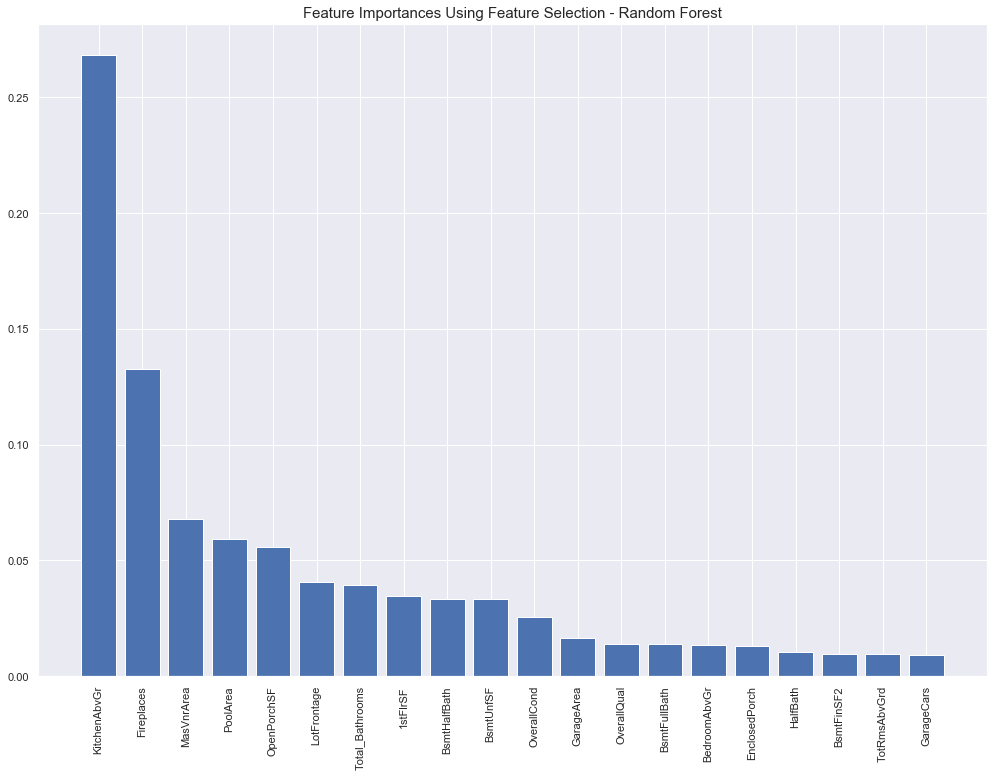

In [176]:
features_plot = features_feat.sort_values(by='Importances', ascending=False).head(20)
f, ax = plt.subplots(figsize=(17, 12))
plt.xticks(rotation='90')
plt.bar(features_plot['Feature'], features_plot['Importances'])
plt.title('Feature Importances Using Feature Selection - Random Forest', fontsize=15)
plt.savefig('Feature Importances Using Feature Selection')
plt.show();

####  Checking to See If Better Results Can Be Produced Adjusting Hyperparameters Using GridSearchCV:
 - Grid search will evaluate all the possible combinations of hyperparameters values using cross-validation.
 - Default max-depth, minimum leaf samples, and minimum sample splits were used due to memory usage and processing issues.
 - Results showed that the model performed better using 100 trees and a maximum of 100 features.
 - However, the model is still overfitting.

In [208]:
#Fine tuning the model to see if it can do any better adjusting hyperparameters with grid search
rfrgrid = RandomForestRegressor(random_state=1, criterion='mse', n_jobs=-1)

#Set parameters to test
param_grid = [
    {'bootstrap':[True], 'n_estimators': [100, 300, 500], 'max_features': [75, 100, 150, 200]}
     ]

#Run grid search to see what best parameters to use
grid_search_rfr = GridSearchCV(rfrgrid, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_rfr.fit(X_train, y_train)

#Checking best results from cross validation 
cvres = grid_search_rfr.cv_results_
print('List of scores on best parameters for random forests using Grid Search: \n')
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

List of scores on best parameters for random forests using Grid Search: 

0.1254704337414763 {'bootstrap': True, 'max_features': 75, 'n_estimators': 100}
0.12612857720799117 {'bootstrap': True, 'max_features': 75, 'n_estimators': 300}
0.12589485716066243 {'bootstrap': True, 'max_features': 75, 'n_estimators': 500}
0.12453625033063288 {'bootstrap': True, 'max_features': 100, 'n_estimators': 100}
0.12474664299622829 {'bootstrap': True, 'max_features': 100, 'n_estimators': 300}
0.12472290633505187 {'bootstrap': True, 'max_features': 100, 'n_estimators': 500}
0.12611891519556437 {'bootstrap': True, 'max_features': 150, 'n_estimators': 100}
0.12542437786431787 {'bootstrap': True, 'max_features': 150, 'n_estimators': 300}
0.12537011692051464 {'bootstrap': True, 'max_features': 150, 'n_estimators': 500}
0.12705224927650943 {'bootstrap': True, 'max_features': 200, 'n_estimators': 100}
0.12601572751203777 {'bootstrap': True, 'max_features': 200, 'n_estimators': 300}
0.1257407143652479 {'bootstr

#### Using GridsearchCV Best Parameters - 100 Trees with Max Features at 100 (Kaggle Score 0.14004):

In [211]:
#Modeling using Random Forest regressor with Cross Validation and Score Results From Grid Search (noting execution time)
start = timer()#timer start
rfr_grid = RandomForestRegressor(n_estimators=100, max_features=100, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1).fit(X_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
rfr_grid_pred = rfr_grid.predict(X_train)
rfr_grid_rmse = np.sqrt(mean_squared_error(y_train, rfr_grid_pred))

#Cross validation with MSE
scores = cross_val_score(rfr_grid, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', rfr_grid_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.04706407758922783

 List of the cross validation scores: 
 [0.10864257 0.1155322  0.13278727 0.13053032 0.14959571 0.10926968
 0.12963348 0.11707724 0.11936233 0.12735405]

 Mean of scores: 
 0.12397848539582294

 Standard Deviation of scores: 
 0.011882558773951779

 Execution time in milliseconds: 694.7361999991699


### Random Forest Using Without Scaling and Different Preparation (Kaggle Score 0.13853):
 - As random forests are scale invariant, the model was tested using unscaled data.
 - Data was also reduced to 162 explanatory variables through exploration and choosing the more salient features through assumptions and estimations.
 - Cross-validation scores showed that model performance improved and generalized better to test data.  
 - However, training score versus mean cross-validation score still shows that the model is underfitting.
 - More data may be required.

#### Data Copied from Initial Preparation Before Scaling:

In [57]:
rfr_prep = rfr_data.reset_index(drop=True)
rfr_prep.shape
rfr_prep

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,Gable,Normal,WD,0,8,856.000,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,Gable,Normal,WD,0,6,1262.000,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,Gable,Normal,WD,0,6,920.000,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,Gable,Abnorml,WD,0,7,756.000,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,Gable,Normal,WD,0,9,1145.000,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,546,546,0,None,3,Twnhs,TA,No,0.000,0.000,...,Gable,Normal,WD,0,5,546.000,0,1970,1970,2006
2913,546,546,0,None,3,TwnhsE,TA,No,252.000,0.000,...,Gable,Abnorml,WD,0,6,546.000,0,1970,1970,2006
2914,1224,0,0,None,4,1Fam,TA,No,1224.000,0.000,...,Gable,Abnorml,WD,0,7,1224.000,474,1960,1996,2006
2915,970,0,0,None,3,1Fam,TA,Av,337.000,0.000,...,Gable,Normal,WD,0,6,912.000,80,1992,1992,2006


#### Adding Features to Unscaled Copied Data (Similar to Before):

In [58]:
#Adding data and applying building class, year sold, and month sold as categories:

#MSSubClass: The building class
rfr_prep['MSSubClass'] = rfr_prep['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
rfr_prep['YrSold'] = rfr_prep['YrSold'].astype(str)
rfr_prep['MoSold'] = rfr_prep['MoSold'].astype(str)

#Year Built and Remodeled
rfr_prep['YrBltAndRemod'] = rfr_prep['YearBuilt'] + rfr_prep['YearRemodAdd']

#Total square footage of house 
rfr_prep['TotalSF'] = rfr_prep['TotalBsmtSF'] + rfr_prep['1stFlrSF'] + rfr_prep['2ndFlrSF']

#Total Square footage of floors
rfr_prep['Total_sqr_footage'] = (rfr_prep['BsmtFinSF1'] + rfr_prep['BsmtFinSF2'] + 
                                 rfr_prep['1stFlrSF'] + rfr_prep['2ndFlrSF'])
# Total Bathrooms
rfr_prep['Total_Bathrooms'] = (rfr_prep['FullBath'] + (0.5 * rfr_prep['HalfBath']) +
                               rfr_prep['BsmtFullBath'] + (0.5 * rfr_prep['BsmtHalfBath']))
#Total porch squarefeet
rfr_prep['Total_porch_sf'] = (rfr_prep['OpenPorchSF'] + rfr_prep['3SsnPorch'] +
                              rfr_prep['EnclosedPorch'] + rfr_prep['ScreenPorch'] +
                              rfr_prep['WoodDeckSF'])

#Whether or not the house has pool, 2nd floor, garage, basement, fireplace
rfr_prep['Hasgarage'] = rfr_prep['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
rfr_prep['Hasbsmt'] = rfr_prep['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
rfr_prep['Hasfireplace'] = rfr_prep['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#### Reducing Features that May Have Caused Random Forest Model to Miss Important Variables Before: 

In [59]:
rfr_prep = rfr_prep.drop(columns=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                                 'MiscVal', 'BsmtHalfBath', 'LowQualFinSF', 'PoolArea', 'BsmtFinSF2', 'BsmtFullBath',
                                 'HalfBath', 'GarageCars', 'BsmtFinSF1', 'BsmtUnfSF', 'YearRemodAdd', 
                                  'FullBath', 'GarageYrBlt', 'Alley', 'BsmtExposure', 'BsmtFinType1',
                                 'BsmtFinType2', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence',
                                'Foundation', 'Functional', 'GarageFinish', 'GarageType', 'LandContour', 'LandSlope','MasVnrType', 
                                'MiscFeature', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType'])

numeric = list(rfr_prep.select_dtypes(exclude=['object']).columns)
for i in numeric:
    rfr_prep[numeric] = rfr_prep[numeric].astype(int)
rfr_prep.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtQual,CentralAir,ExterCond,ExterQual,FireplaceQu,...,YearBuilt,YrSold,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Hasgarage,Hasbsmt,Hasfireplace
0,856,854,3,1Fam,TA,Gd,Y,TA,Gd,None,...,2003,2008,4006,2566,2416,3,61,1,1,0
1,1262,0,3,1Fam,TA,Gd,Y,TA,TA,TA,...,1976,2007,3952,2524,2240,2,298,1,1,1
2,920,866,3,1Fam,TA,Gd,Y,TA,Gd,TA,...,2001,2008,4003,2706,2272,3,42,1,1,1
3,961,756,3,1Fam,Gd,TA,Y,TA,TA,Gd,...,1915,2006,3885,2473,1933,2,307,1,1,1
4,1145,1053,4,1Fam,TA,Gd,Y,TA,Gd,TA,...,2000,2008,4000,3343,2853,3,276,1,1,1


#### Create Dummy Variables:

In [60]:
rfr_final = pd.get_dummies(rfr_prep)
rfr_final.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,Fireplaces,GarageArea,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MasVnrArea,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856,854,3,0,548,1710,1,8450,65,196,...,0,0,0,0,0,0,0,1,0,0
1,1262,0,3,1,460,1262,1,9600,80,0,...,0,0,0,0,1,0,1,0,0,0
2,920,866,3,1,608,1786,1,11250,68,162,...,0,0,0,0,0,0,0,1,0,0
3,961,756,3,1,642,1717,1,9550,60,0,...,0,0,0,0,0,1,0,0,0,0
4,1145,1053,4,1,836,2198,1,14260,84,350,...,0,0,0,0,0,0,0,1,0,0


#### Get New Train and Test Sets for Modeling:

In [61]:
rfr_final = rfr_final.reset_index(drop=True)
rfr_final_train = rfr_final[:atrain]
rfr_final_test = rfr_final[atrain:]
rfr_final_train = rfr_final_train.drop(rfr_final_train.index[outliers])

rfr_final_train.shape, y_train.shape, rfr_final_test.shape

((1453, 162), (1453,), (1459, 162))

#### Convert to array:

In [62]:
rfr_train = rfr_final_train.to_numpy()
rfr_test = rfr_final_test.to_numpy()

#### Cross Validation Scores:

In [217]:
#Modeling using Random Forest regressor with Cross Validation and Score Results (noting execution time)
start = timer()#timer start

rfr_data = RandomForestRegressor(n_estimators=300, max_features=40, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1).fit(rfr_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
rfr_data_pred = rfr_data.predict(rfr_train)
rfr_data_rmse = np.sqrt(mean_squared_error(y_train, rfr_data_pred))

#Cross validation with MSE
scores = cross_val_score(rfr_data, rfr_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', rfr_data_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.045637446458057826

 List of the cross validation scores: 
 [0.10782075 0.11721448 0.13088339 0.13044983 0.14201202 0.11036792
 0.12941541 0.11088077 0.11683448 0.12634003]

 Mean of scores: 
 0.12222190671239053

 Standard Deviation of scores: 
 0.010647554572746017

 Execution time in milliseconds: 1521.9830999994883


#### Feature Importances:
 - Feature importances shows close similarities to the random forest model with scaled features for linear model.
 -	Examining the output of each feature’s importance reveal key insights on which explanatory variables are the most important in predicting home prices.
 - Although scores were not better than ridge and lasso regression, features of highest importance are somewhat similar to the highest coefficients with positive values from both linear regression models. 


In [166]:
features_data = pd.DataFrame([rfr_final_train.columns, rfr_data.feature_importances_]).transpose()
features_data = features.rename(columns={0: 'Feature', 1: 'Importances'})
features.sort_values(by='Importances', ascending=False).head(10)

,Feature,Importances
16,TotalSF,0.189
11,OverallQual,0.184
17,Total_sqr_footage,0.108
5,GrLivArea,0.071
15,YrBltAndRemod,0.060
14,YearBuilt,0.053
48,ExterQual_TA,0.039
4,GarageArea,0.037
13,TotalBsmtSF,0.032
0,1stFlrSF,0.021


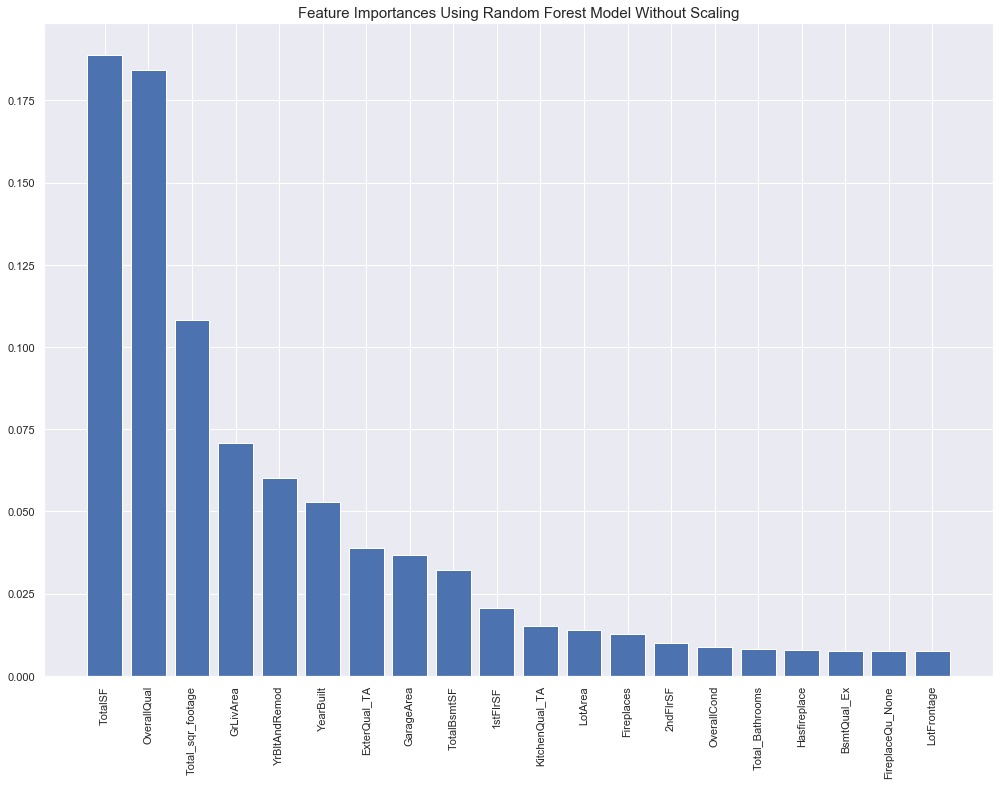

In [178]:
features_plot = features_data.sort_values(by='Importances', ascending=False).head(20)
f, ax = plt.subplots(figsize=(17, 12))
plt.xticks(rotation='90')
plt.bar(features_plot['Feature'], features_plot['Importances'])
plt.title('Feature Importances Using Random Forest Model Without Scaling and Reduced Features', fontsize=15)
plt.savefig('Feature Importances Using Random Forest Model Without Scaling')
plt.show();

#### Learning Curve for Random Forest Model that is Unscaled with Reduced Features:
 - Learning curve looks similar to previous model using full features and scaled data. However, cross validation scores are slightly better on training set sizes.
 - Learning curve still indicates overfitting where more data may be required.   

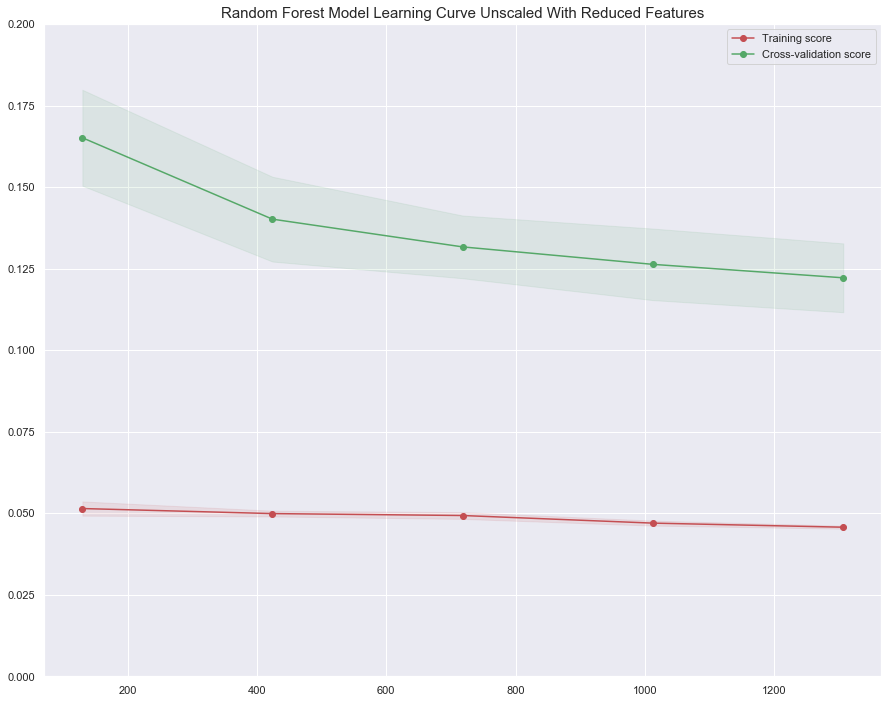

In [193]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, random forest
#unscaled
learning_plot(rfr_data, rfr_train, y_train, 0, 0.20, 'Random Forest Model Learning Curve Unscaled With Reduced Features')

#### Checking to See If Better Results Can Be Produced Adjusting Hyperparameters Using GridSearchCV:

 - Grid search will evaluate all the possible combinations of hyperparameters values using cross-validation.
 - Default max-depth, minimum leaf samples, and minimum sample splits were used due to memory usage and processing issues.
 - Results showed that the model is using the best parameters already.

In [63]:
#Fine tuning the model to see if it can do any better adjusting hyperparameters with grid search
rfrdatagrid = RandomForestRegressor(random_state=1, criterion='mse', n_jobs=-1)

#Set parameters to test
param_grid = [
    {'bootstrap':[True], 'n_estimators': [100, 300, 500], 'max_features': [25, 40, 60, 100]}
     ]

#Run grid search to see what best parameters to use
grid_search_data = GridSearchCV(rfrdatagrid, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_data.fit(rfr_train, y_train)

#Checking best results from cross validation 
cvres = grid_search_data.cv_results_
print('List of scores on best parameters for random forest with reduced features using Grid Search: \n')
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

List of scores on best parameters for random forest with reduced features using Grid Search: 

0.12444051819285674 {'bootstrap': True, 'max_features': 25, 'n_estimators': 100}
0.12400325239395561 {'bootstrap': True, 'max_features': 25, 'n_estimators': 300}
0.12407070762914062 {'bootstrap': True, 'max_features': 25, 'n_estimators': 500}
0.12309298081275262 {'bootstrap': True, 'max_features': 40, 'n_estimators': 100}
0.12267735903399737 {'bootstrap': True, 'max_features': 40, 'n_estimators': 300}
0.12281877794331796 {'bootstrap': True, 'max_features': 40, 'n_estimators': 500}
0.124177879412116 {'bootstrap': True, 'max_features': 60, 'n_estimators': 100}
0.12390900489670598 {'bootstrap': True, 'max_features': 60, 'n_estimators': 300}
0.12368016380669042 {'bootstrap': True, 'max_features': 60, 'n_estimators': 500}
0.12538728380253933 {'bootstrap': True, 'max_features': 100, 'n_estimators': 100}
0.12457937825954943 {'bootstrap': True, 'max_features': 100, 'n_estimators': 300}
0.124693534511

### Extra Trees Regressor:
 - In an extra trees regressor, or an extremely randomized tree ensemble, trees are even more randomized by also using random thresholds for each feature rather than searching for the best possible thresholds.
 - This trades more bias for a lower variance, which can reduce overfitting. 
 - Extra trees are much faster to train than regular random forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.
 - However, it is hard to tell whether a random forest model or an extra trees model will perform better or worse. The only way to know is to try both, and compare using cross-validation and tuning the hyperparameters.

#### Cross Validation Scores:

In [64]:
#Modeling using extra trees regressor with Cross Validation and Score Results (noting execution time)
start = timer()#timer start

xtrees = ExtraTreesRegressor(n_estimators=300, max_features=100, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1).fit(X_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
xtrees_pred = xtrees.predict(X_train)
xtrees_rmse = np.sqrt(mean_squared_error(y_train, xtrees_pred))

#Cross validation with MSE
scores = cross_val_score(xtrees, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', xtrees_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.049249100973519755

 List of the cross validation scores: 
 [0.11055652 0.12480642 0.14081679 0.14699141 0.1681769  0.12242982
 0.14216325 0.12168585 0.12602593 0.13248641]

 Mean of scores: 
 0.13361393106359515

 Standard Deviation of scores: 
 0.015601141805244629

 Execution time in milliseconds: 1555.7846000001518


#### Feature Importances:
 - Interestingly, feature importance calculations are quite different, though some features are similar to the first random forest model. 
 - Top features include more qualitative features than the first random forest model as well.

In [52]:
features_xt = pd.DataFrame([train.columns, xtrees.feature_importances_]).transpose()
features_xt = features_xt.rename(columns={0: 'Feature', 1: 'Importances'})
features_xt.sort_values(by='Importances', ascending=False).head(10)

,Feature,Importances
112,ExterQual_TA,0.126
25,OverallQual,0.091
13,GarageCars,0.054
15,GrLivArea,0.051
213,KitchenQual_TA,0.039
11,FullBath,0.038
152,FireplaceQu_None,0.035
42,Hasfireplace,0.033
36,Total_Bathrooms,0.025
75,BsmtQual_Ex,0.025


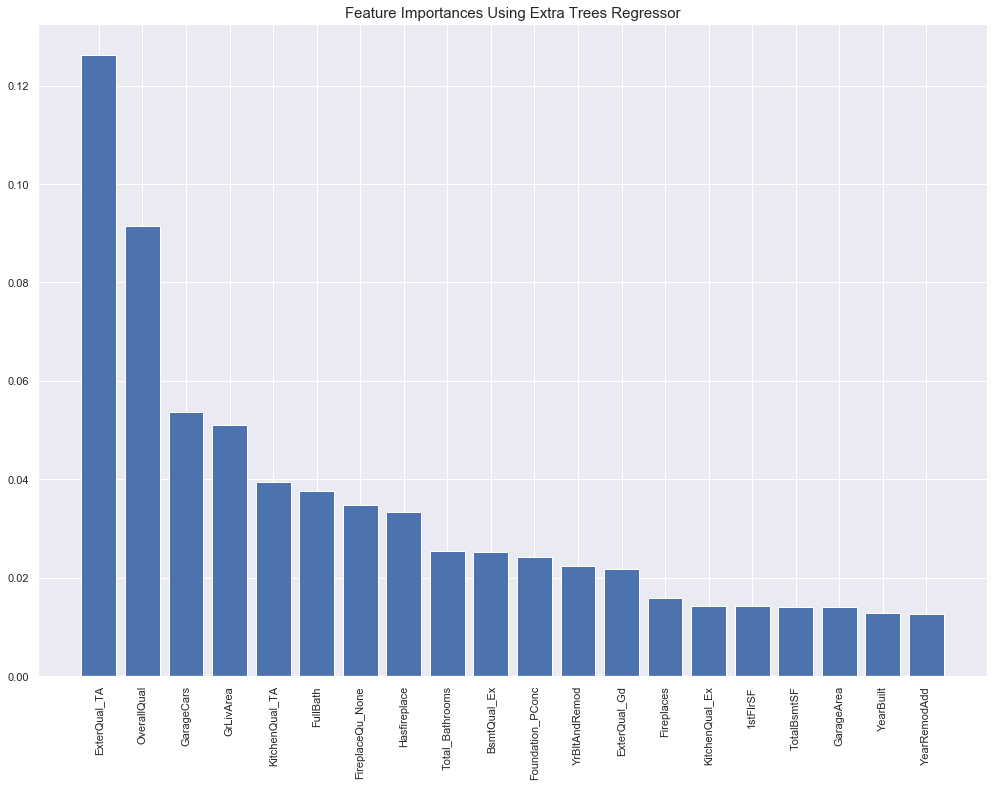

In [53]:
features_plot = features_xt.sort_values(by='Importances', ascending=False).head(20)
f, ax = plt.subplots(figsize=(17, 12))
plt.xticks(rotation='90')
plt.bar(features_plot['Feature'], features_plot['Importances'])
plt.title('Feature Importances Using Extra Trees Regressor', fontsize=15)
plt.savefig('Feature Importances Using Extra Trees Regressor')
plt.show();

#### Learning Curve Extra Trees:
 - Similar to the learning curve for the random forest model, there is a large gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model.
 - Sign that more data may be required. In a much larger training set, the two curves would continue to get closer. 

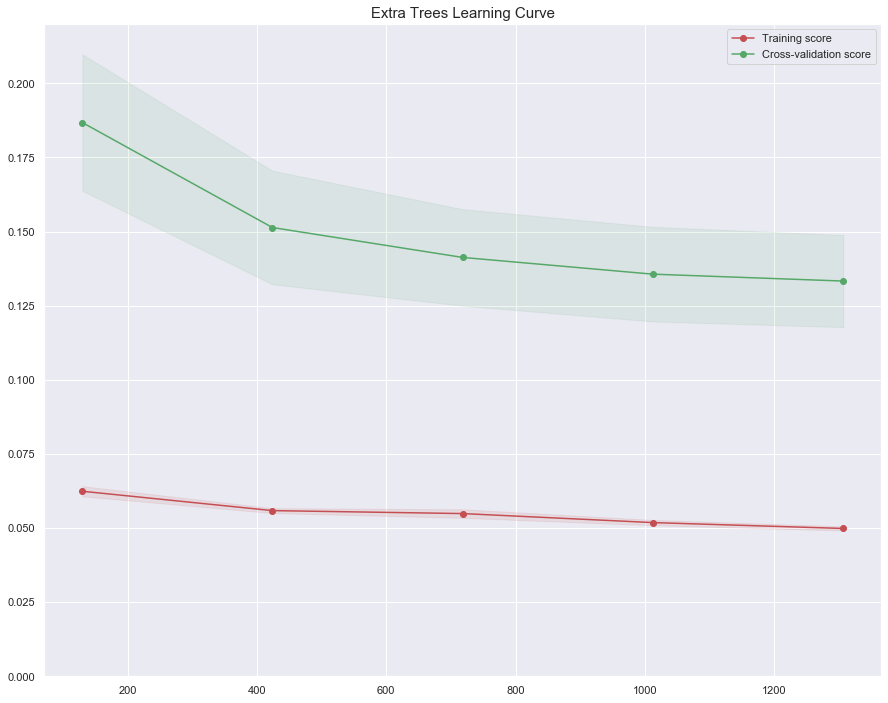

In [54]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, extra trees
learning_plot(xtrees, X_train, y_train, 0, 0.22, 'Extra Trees Learning Curve')

####  Checking to See If Better Results Can Be Produced Adjusting Hyperparameters Using GridSearchCV:
 - Grid search will evaluate all the possible combinations of hyperparameters values using cross-validation.
 - Results do not look better due to parameters max-depth, minimum leaf samples, and minimum split samples.
 - Therefore, the best score using default max-depth, minimum leaf samples, and minimum split samples will be used.
 - This produced better results using 500 trees and max features of 200.

In [55]:
#Fine tuning the model to see if it can do any better adjusting hyperparameters with grid search
xtreesgrid = ExtraTreesRegressor(random_state=1, criterion='mse', n_jobs=-1)

#Set parameters to test
param_grid = [
    {'bootstrap':[True], 'n_estimators': [100, 300, 500], 'max_features': [75, 100, 150, 200], 
     'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}
     ]

#Run grid search to see what best parameters to use
grid_search_trees = GridSearchCV(xtreesgrid, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_trees.fit(X_train, y_train)

#Checking best results from cross validation 
cvres = grid_search_trees.cv_results_
print('List of scores on best parameters for extra trees regressor using Grid Search: \n')
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

List of scores on best parameters for extra trees regressor using Grid Search: 

0.140772377375185 {'bootstrap': True, 'max_depth': 80, 'max_features': 75, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.14011747797085006 {'bootstrap': True, 'max_depth': 80, 'max_features': 75, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.14021399416000116 {'bootstrap': True, 'max_depth': 80, 'max_features': 75, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.14076173478181708 {'bootstrap': True, 'max_depth': 80, 'max_features': 75, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.14028866380044422 {'bootstrap': True, 'max_depth': 80, 'max_features': 75, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.14054238448628492 {'bootstrap': True, 'max_depth': 80, 'max_features': 75, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500}
0.14214961050879818 {'bootstrap': True, 'max_dep

#### Using GridsearchCV Best Parameters - 500 Trees with Max Features at 200 (Kaggle Score 0.14675):

In [65]:
#Modeling using extra trees regressor with Cross Validation and Score Results (noting execution time) using best parameters
#from grid search.
start = timer()#timer start

xtreesgrid = ExtraTreesRegressor(n_estimators=500, max_features=200, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1).fit(X_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
xtreesgrid_pred = xtreesgrid.predict(X_train)
xtreesgrid_rmse = np.sqrt(mean_squared_error(y_train, xtreesgrid_pred))

#Cross validation with MSE
scores = cross_val_score(xtreesgrid, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', xtreesgrid_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.04805269576861514

 List of the cross validation scores: 
 [0.10857038 0.11776115 0.13558745 0.13993375 0.16494212 0.12289254
 0.14066882 0.11958075 0.12372256 0.13146548]

 Mean of scores: 
 0.13051250074359538

 Standard Deviation of scores: 
 0.015072147404194644

 Execution time in milliseconds: 4080.673999999817


#### Feature Importances:
 - Interestingly, feature importance calculations are quite different, though some features are similar to the first random forest model. 
 - Top features include more qualitative features than the first random forest model as well.

In [68]:
features_xtgrid = pd.DataFrame([train.columns, xtreesgrid.feature_importances_]).transpose()
features_xtgrid = features_xtgrid.rename(columns={0: 'Feature', 1: 'Importances'})
features_xtgrid.sort_values(by='Importances', ascending=False).head(10)

,Feature,Importances
112,ExterQual_TA,0.164
25,OverallQual,0.145
15,GrLivArea,0.061
13,GarageCars,0.052
11,FullBath,0.034
33,YrBltAndRemod,0.030
75,BsmtQual_Ex,0.028
36,Total_Bathrooms,0.027
213,KitchenQual_TA,0.026
152,FireplaceQu_None,0.025


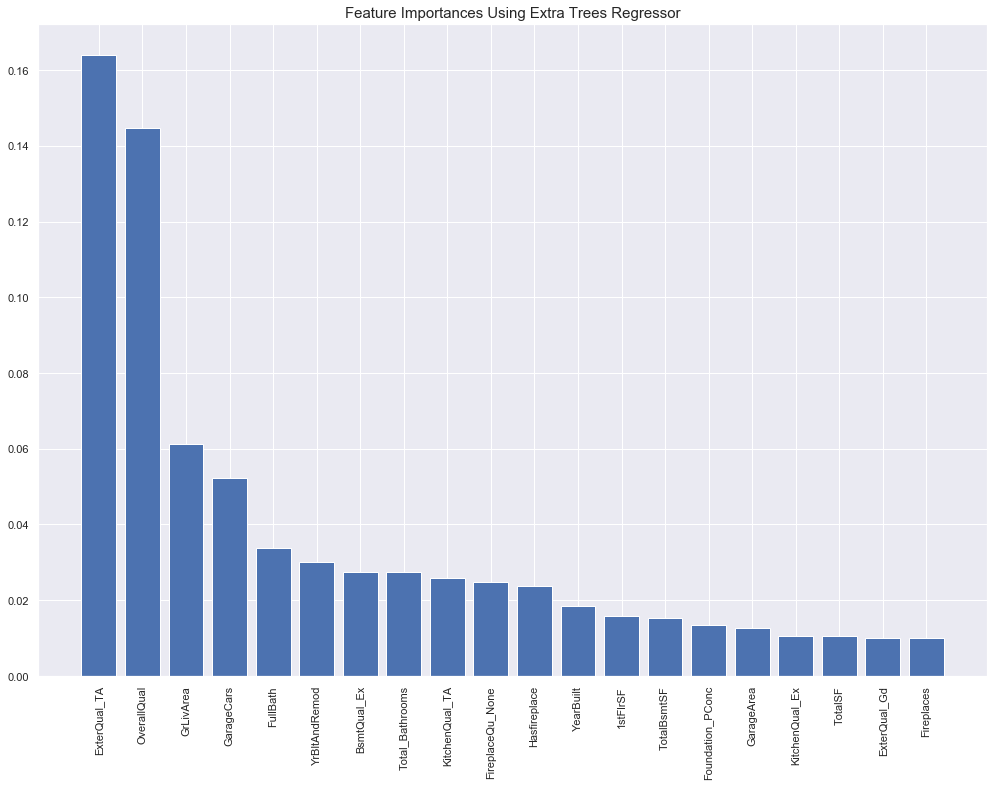

In [69]:
features_plot = features_xtgrid.sort_values(by='Importances', ascending=False).head(20)
f, ax = plt.subplots(figsize=(17, 12))
plt.xticks(rotation='90')
plt.bar(features_plot['Feature'], features_plot['Importances'])
plt.title('Feature Importances Using Extra Trees Regressor', fontsize=15)
plt.savefig('Feature Importances Using Extra Trees Regressor')
plt.show();

#### Learning Curve Extra Trees Using Best Parameters from Grid Search:
 - Similar to the learning curve for the random forest model, there is a large gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model.
 - Sign that more data may be required. In a much larger training set, the two curves would continue to get closer. 

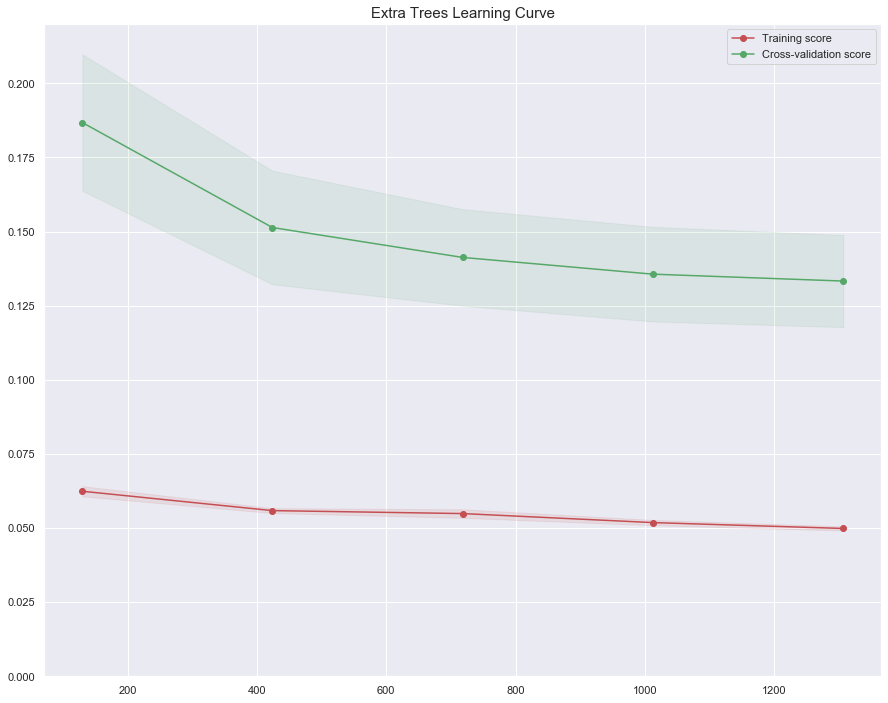

In [70]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, extra trees
learning_plot(xtrees, X_train, y_train, 0, 0.22, 'Extra Trees Learning Curve')

#### Extra Trees Regressor Using Unscaled Data and Reduced Features (Kaggle Score 0.14744):
 - Cross-validation scores showed improvement; however test scores were not better.

In [71]:
#Modeling using extra trees regressor with Cross Validation and Score Results (noting execution time) using best parameters
#from grid search.
start = timer()#timer start

xtreesdata = ExtraTreesRegressor(n_estimators=300, max_features=40, criterion='mse', 
                            random_state = 1, bootstrap=True, n_jobs=-1).fit(rfr_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
xtreesdata_pred = xtreesdata.predict(rfr_train)
xtreesdata_rmse = np.sqrt(mean_squared_error(y_train, xtreesdata_pred))

#Cross validation with MSE
scores = cross_val_score(xtreesdata,rfr_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', xtreesdata_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.047716599607687725

 List of the cross validation scores: 
 [0.10513103 0.1229006  0.14105325 0.14032168 0.15904482 0.11754135
 0.13520704 0.11639842 0.11729991 0.13007804]

 Mean of scores: 
 0.1284976146240025

 Standard Deviation of scores: 
 0.014990800148929546

 Execution time in milliseconds: 756.595799999559


### Gradient Boosting (Kaggle Score 0.12841):
 - Boosting refers to any Ensemble method that can combine several weak learners into a strong learner.
 - Boosting methods train predictors sequentially, each trying to correct its predecessor.
 - Gradient boosting tries to fit the new predictor to the residual errors made by the previous predictor.
 - Response variable is based of residuals that are refit over and over again.
 - The main idea behind gradient boosting is to combine many simple models like shallow trees.
 - Each tree can only provide good predictions on part of the data, and so more trees are added iteratively, improving performance.
 - They are more sensitive to parameter settings than random forests, but can provide better accuracy if set correctly.
 - An important parameter of gradient boosting is the learning rate, which controls how strongly each tree tries to correct mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees also increases complexity, as it provides more chances to correct mistakes on the training set.
 - A lower learning rate, called shrinkage, tends to generalize much better; however, the model may need more trees. A higher learning rate runs risk of overfitting, and too many trees can cause overfitting as well.
 - Early stopping or using grid search, are methods to find the optimal number of trees.
 - Limiting the max depth can also reduce overfitting (default is usually 3).
 - Cross-validation score results were much better than random forest and extra trees regression. The average cross validation score of 0.1084 is very close to the average score for ridge regression.
 - However, scoring on the test set had a higher RMSE, indicating that the model is overfitting. 
 - On the other hand, it is recommended that gradient boosting is used over random forests for this case.

#### Searching for Best Parameters Using GridSearchCV:

In [141]:
#Fine tuning the model to run using the best hyperparameters with grid search

gbrtgrid = GradientBoostingRegressor(random_state=1)

#Set parameters to test
param_grid = [
    {'n_estimators': [50, 100, 300, 500], 'max_depth': [1, 2, 3], 'learning_rate': [0.1, 0.2]}
     ]

#Run grid search to see what best parameters to use
grid_search_gbrt = GridSearchCV(gbrtgrid, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_gbrt.fit(X_train, y_train)

#Checking best results from cross validation 
cvres = grid_search_gbrt.cv_results_
print('List of scores on best parameters for Gradient Boosting using Grid Search: \n')
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

List of scores on best parameters for Gradient Boosting using Grid Search: 

0.1712830871549973 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.1393576774457547 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.11602619430607089 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
0.1119255286785764 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}
0.1349104855539519 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
0.11888765118177747 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.1103777616175632 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
0.10897245706537077 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
0.12327467546946352 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.11417353964202699 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.11032711971185588 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.10965170551662135 {'learning_rate': 0.1, 'max_dep

#### Cross Validation Scores:

In [82]:
#Modeling using gradient boosting regressor with Cross Validation and Score Results Using Parameters from GridSearchCV 
#(noting execution time)
start = timer()#timer start

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=500, criterion='friedman_mse',
                                 random_state=1).fit(X_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
gbrt_pred = gbrt.predict(X_train)
gbrt_rmse = np.sqrt(mean_squared_error(y_train, gbrt_pred))

#Cross validation with MSE
scores = cross_val_score(gbrt, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', gbrt_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.06206721620348008

 List of the cross validation scores: 
 [0.10574675 0.09653326 0.10116191 0.11329102 0.13078671 0.10222527
 0.12249261 0.09661711 0.09962645 0.11573311]

 Mean of scores: 
 0.10842141991551438

 Standard Deviation of scores: 
 0.01109795758605056

 Execution time in milliseconds: 3382.4676999993244


#### Feature Importances:
 - Although slightly different, feature importances are close to the random forest model employed.
 - However, weights of some features are different from feature correlations to selling price examined before.
 - This is indication that there may be too many explanatory variables where accurately assessing relevant variables proved difficult.

In [184]:
features_gb = pd.DataFrame([train.columns, gbrt.feature_importances_]).transpose()
features_gb = features_gb.rename(columns={0: 'Feature', 1: 'Importances'})
features_gb.sort_values(by='Importances', ascending=False).head(10)

,Feature,Importances
25,OverallQual,0.413
15,GrLivArea,0.156
29,TotalBsmtSF,0.071
36,Total_Bathrooms,0.059
33,YrBltAndRemod,0.046
13,GarageCars,0.034
18,LotArea,0.020
152,FireplaceQu_None,0.020
0,1stFlrSF,0.019
24,OverallCond,0.016


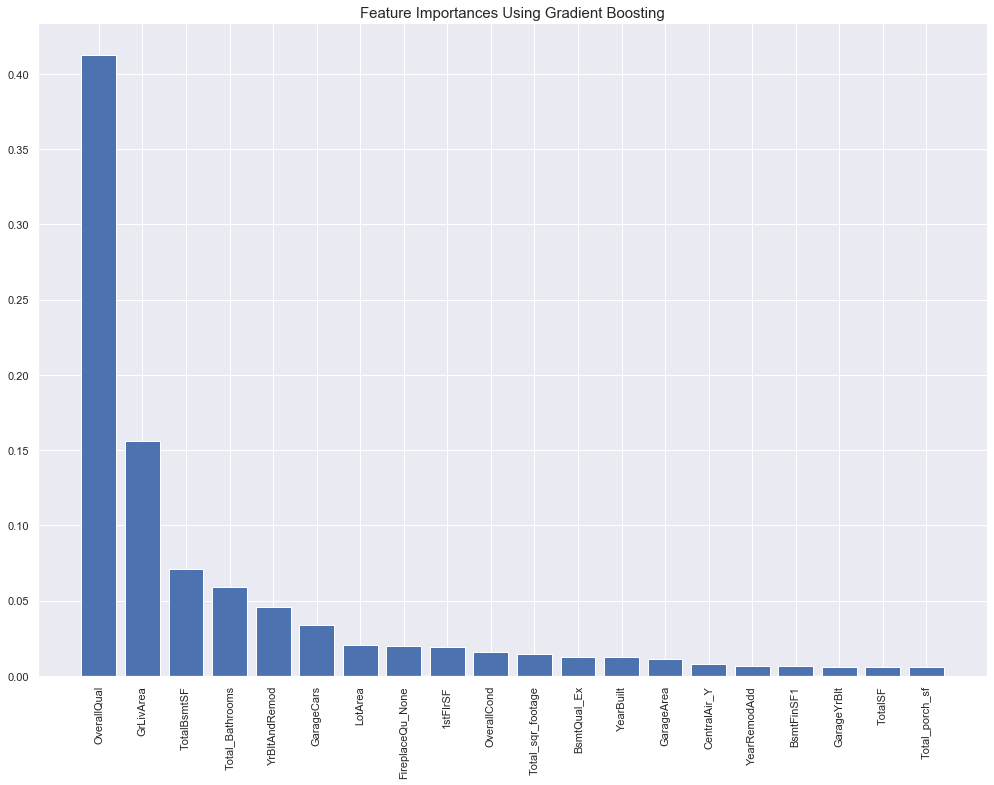

In [185]:
features_plot = features_gb.sort_values(by='Importances', ascending=False).head(20)
f, ax = plt.subplots(figsize=(17, 12))
plt.xticks(rotation='90')
plt.bar(features_plot['Feature'], features_plot['Importances'])
plt.title('Feature Importances Using Gradient Boosting', fontsize=15)
plt.savefig('Feature Importances Using Gradient Boosting')
plt.show();

#### Learning Curve for Gradient Boosting:

 - Learning curves show that there is a wide gap between training and cross-validation scores at the smaller training set sizes. 
 - Though the gap narrows as the training set sizes grow larger, curves show that the gap is still significant, indicating that the model is overfitting, which is evident when comparing the difference between mean RMSE scores through cross-validation, and RMSE from the test data set. 
 - In this case, a larger training set may prove to be helpful. 
 - However, the learning curves show a stark difference from the curves for the random forest methods employed, as learning curves here show much better generalization, which is also supported by the RMSE from the test set.


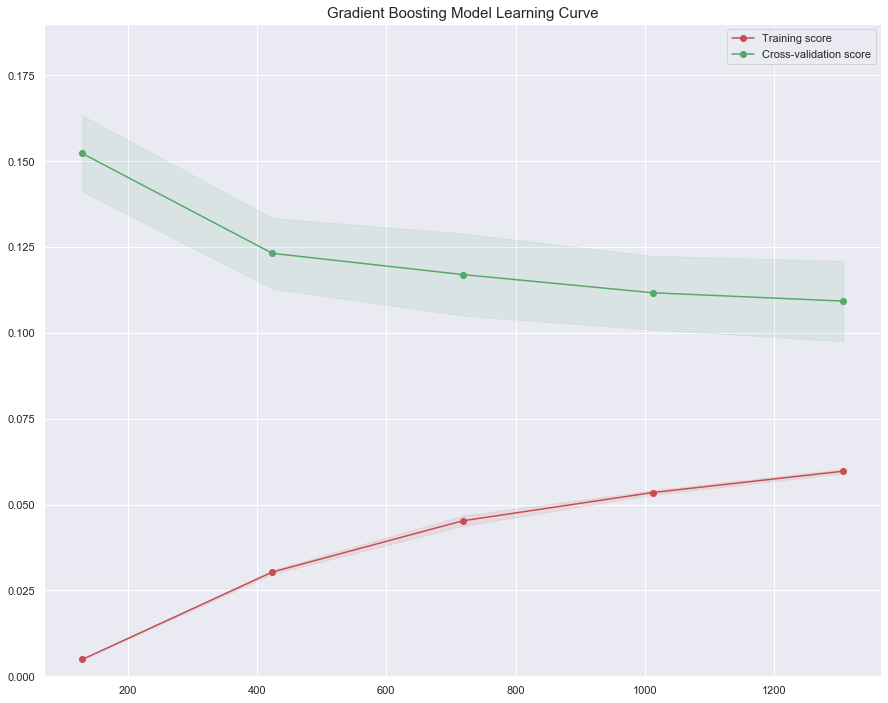

In [196]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, gradient boosting
learning_plot(gbrt, X_train, y_train, 0, 0.20, 'Gradient Boosting Model Learning Curve')

### XGBoost (Kaggle Score 0.12861):
 - Similar to gradient boosting, XGBoost is basically a faster implementation of gradient boosted trees.
 - It does this by considering the potential loss for all possible splits to create a new branch.
 - XGBoost looks at the distribution of features across all data points in a leaf and uses this information to reduce the search space possible of future splits.
 - However, there are more hyperparameters using XGBoost, which can cause more sensitivity.
 - Mean cross-validation scores show that they are slightly better, yet testing shows that using gradient boosting scored a little higher.  

In [87]:
#Modeling using XGBoost with Cross Validation and Score Results (noting execution time)
start = timer()#timer start

xgb_reg = xgboost.XGBRegressor(objective ='reg:squarederror', max_depth=3, eta=0.1, n_estimators=500, random_state=1, 
                               n_jobs=-1).fit(X_train, y_train)

end = timer()#timer end
exec_time = (end-start)*1000

#RMSE on Training Prediction
xgb_pred = xgb_reg.predict(X_train)
xgb_rmse = np.sqrt(mean_squared_error(y_train, xgb_pred))

#Cross validation with MSE
scores = cross_val_score(xgb_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', xgb_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.04146555289109695

 List of the cross validation scores: 
 [0.10326223 0.09635834 0.10481455 0.11430849 0.12824401 0.09991327
 0.11829305 0.0958642  0.1002832  0.11753173]

 Mean of scores: 
 0.10788730696624513

 Standard Deviation of scores: 
 0.010424177726383533

 Execution time in milliseconds: 4547.550499999488


#### Feature Importances:

In [187]:
features_xgb = pd.DataFrame([train.columns, xgb_reg.feature_importances_]).transpose()
features_xgb = features_xgb.rename(columns={0: 'Feature', 1: 'Importances'})
features_xgb.sort_values(by='Importances', ascending=False).head(10)

,Feature,Importances
13,GarageCars,0.157
183,GarageQual_TA,0.096
75,BsmtQual_Ex,0.093
10,Fireplaces,0.057
25,OverallQual,0.042
36,Total_Bathrooms,0.040
15,GrLivArea,0.035
29,TotalBsmtSF,0.031
249,MSZoning_RM,0.028
33,YrBltAndRemod,0.025


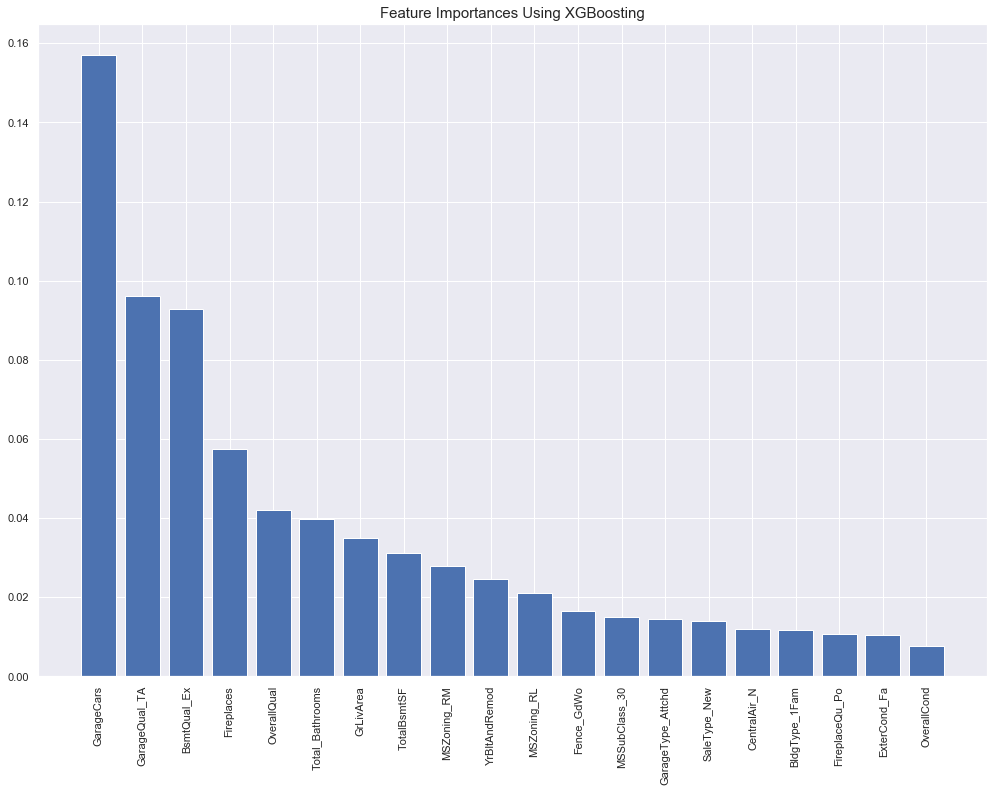

In [188]:
features_plot = features_xgb.sort_values(by='Importances', ascending=False).head(20)
f, ax = plt.subplots(figsize=(17, 12))
plt.xticks(rotation='90')
plt.bar(features_plot['Feature'], features_plot['Importances'])
plt.title('Feature Importances Using XGBoosting', fontsize=15)
plt.savefig('Feature Importances Using XGBoosting')
plt.show();

#### Learning Curve for XGBoost:
 - Learning curve shows a wide gap similar to unregularized linear regression but it is most likely to learning rate.
 - Gap narrows at the end gravitating close. Cross validation score decreases as training sets grow.
 - Scores show that model might be overfitting.

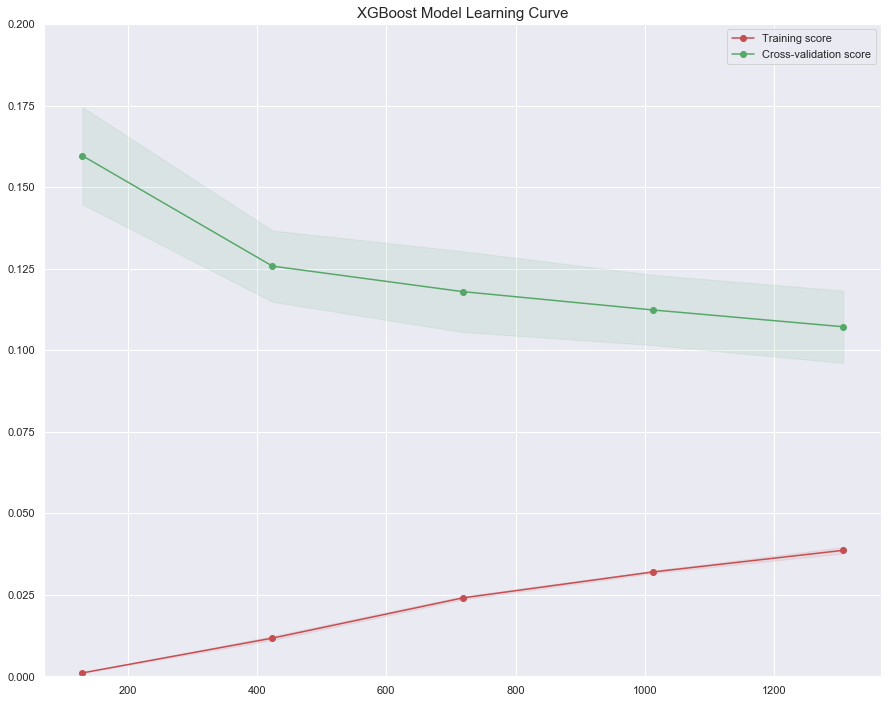

In [198]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, XGBoost
learning_plot(xgb_reg, X_train, y_train, 0, 0.20, 'XGBoost Model Learning Curve')

### Voting Regressor Using Lasso and Ridge Regression (Kaggle Score of 0.11621):
 - Voting regressors aggregate predictions of each explanatory variable and predicts based off the best fit, and returns the average of the individual predictions to form a final prediction.
 - In the case of voting classifiers, if each classifier is a weak learner, the ensemble can still be a strong learner, provided that there a sufficient number of weak learners and are diverse.
 - Using diverse classifiers, they will train on different algorithms, which increases the chance that they will make different types of errors, improving the ensemble's accuracy.
 - Results show below that the mean cross validation score of 0.099743 is very close to the score for lasso regression.
 - Scores on the test set showed that this was the best model. Therefore, it is recommended that using a voting regressor, with lasso and ridge regression in its ensemble, is used.

In [148]:
#Modeling using Voting regressor with Cross Validation and Score Results (noting execution time)

voting_reg = VotingRegressor([('lr', lasso), ('lrr', ridge)], n_jobs=-1)
voting_reg.fit(X_train, y_train)

#RMSE on Training Prediction
voting_pred = voting_reg.predict(X_train)
voting_rmse = np.sqrt(mean_squared_error(y_train, voting_pred))

#Cross validation with MSE
scores = cross_val_score(voting_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', voting_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.08766095571782036

 List of the cross validation scores: 
 [0.08856891 0.0914746  0.10050586 0.10503823 0.12153199 0.09727545
 0.11060475 0.08620542 0.09174193 0.10448869]

 Mean of scores: 
 0.0997435828959563

 Standard Deviation of scores: 
 0.010442602977003695

 Execution time in milliseconds: 9266.564599998674


#### Learning Curve Using Voting Regressor :
 - Similar to the learning curves with lasso and ridge regression the gap does not start too wide and narrows at the end as scores get better
 - Model seems to generalize well.

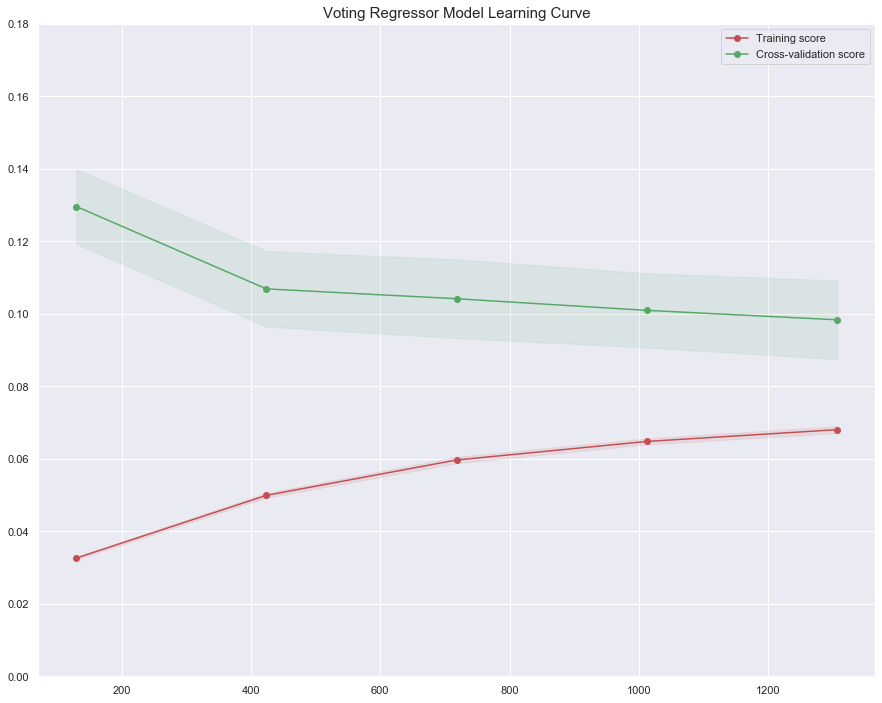

In [199]:
#Learning curve plot showing gap between training scores and cross validation scores by training set size, random forest
learning_plot(voting_reg, X_train, y_train, 0, 0.18, 'Voting Regressor Model Learning Curve')

#### Voting Regressor Including XGBoost:
 - Has the best mean cross validation score.
 - Kaggle score is not as high using as using a voting regressor for just lasso and ridge regression, but is very close.
 - Either model should generalize okay.

In [151]:
#Modeling using Voting regressor adding XGBoost with Cross Validation and Score Results (noting execution time)

voting_reg = VotingRegressor([('lr', lasso), ('lrr', ridge), ('xgb', xgb_reg)], n_jobs=-1)
voting_reg.fit(X_train, y_train)

#RMSE on Training Prediction
voting_pred = voting_reg.predict(X_train)
voting_rmse = np.sqrt(mean_squared_error(y_train, voting_pred))

#Cross validation with MSE
scores = cross_val_score(voting_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

#Convert to RMSE and print # of features, scores, mean, and std 
scores = np.sqrt(-scores)
print(' Initial RMSE on Training Data: \n', voting_rmse)
print('\n List of the cross validation scores: \n', scores)
print('\n Mean of scores: \n', scores.mean())
print('\n Standard Deviation of scores: \n', scores.std())
print('\n Execution time in milliseconds:', exec_time)

 Initial RMSE on Training Data: 
 0.06937871154784768

 List of the cross validation scores: 
 [0.08972912 0.08882006 0.09723098 0.10476643 0.12085659 0.09431698
 0.10991334 0.08527983 0.08958931 0.10542104]

 Mean of scores: 
 0.09859236736010606

 Standard Deviation of scores: 
 0.010775324546280727

 Execution time in milliseconds: 9266.564599998674


### Conclusion:
 - The main objective of this study was to retest housing data taken from residential home sales in Ames, Iowa from the years 2006 to 2010. Data was tested utilizing 7 methods: OLS (Ordinary Least Squares) regression without regularization, ridge regression, lasso regression, random forests, extra trees, and regression using a voting regressor.
 - Models were tested using a 10 fold cross-validation design. Method of cross-validation used was K-fold cross-validation, which randomly splits a training set into 10 distinct subsets called folds, then trains and evaluates the model n (i.e. 10) times, picking a different fold for evaluation every time and training on the other n (i.e. 9) folds.
 - Results showed that using a voting regressor utilizing ridge and lasso regression in its ensemble performed the best as the training set scored with an average RMSE of around 0.0997413 within a 10 fold cross-validation design, and scored with an RMSE of 0.11621 on the test set.
 - Given the overall mean RMSE score from cross-validation, and score from the test set, it is recommended that the voting regressor should be employed for predicting further home prices until other methods can be explored.

In [85]:
predict = xgb_reg.predict(X_test)
predict = np.exp(predict)
submission = pd.DataFrame(test_ID, columns=['Id'])
submission['SalePrice'] = predict
submission.to_csv('submission.csv', index=False)

In [86]:
submission.head()

,Id,SalePrice
0,1461,125566.531
1,1462,157120.969
2,1463,184379.438
3,1464,192571.062
4,1465,185910.453
